# Analysis of Clonesig results on the TCGA
## Pancancer analysis

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import pandas as pd
import os
from statsmodels.stats.multitest import multipletests
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import collections

pd.options.display.max_columns = 200
phd_folder_path = '/Users/JudithAbecassis/Documents/PhD'
os.chdir('{}/TCGA_signatures'.format(phd_folder_path))
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

To have a first look at data, we look how many clones were found by Clonesig for the public and protected input SNVs.

In [3]:
clonesig_res = pd.read_csv('20190824_tcga_results_survival_restr.csv', sep='\t')

In [4]:
clonesig_res[clonesig_res.mutation_set=='public'].nb_clones.value_counts()

1    4061
2    3940
3     810
4     122
5      14
6       7
Name: nb_clones, dtype: int64

In [5]:
clonesig_res[clonesig_res.mutation_set=='protected'].nb_clones.value_counts()

2    4823
1    2396
3    1435
4     262
5      35
6       2
7       1
Name: nb_clones, dtype: int64

Then we look at survival curves for the whole TCGA, first distinguishing 1 or 2 clones and more, then 1, 2, and 3 clones and more, and finally 1, 2 clones with no significant signature change, or 2 clones with a significant signature change, for the protected input SNVS

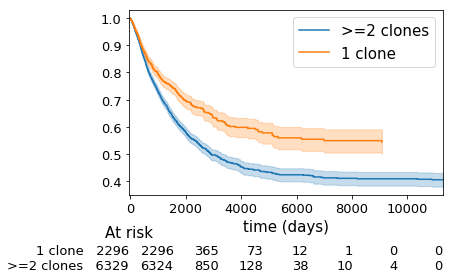

In [37]:
sns.set_context(font_scale=2.5)
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='protected')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones!=1].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='>=2 clones')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)
ax.legend(fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_2_protected_survival_tcga.pdf', bbox_inches='tight')


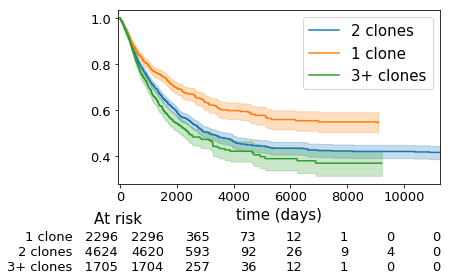

In [38]:
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='protected')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==2].index)
ix3 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones>=3].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='2 clones')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)

kmf3.fit(clonesig_res_all_protected.survival_days[ix3], clonesig_res_all_protected.binary_vital_status[ix3], label='3+ clones')
ax = kmf3.plot(ax=ax)

ax.legend(fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, kmf3, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_3_protected_survival_tcga.pdf', bbox_inches='tight')


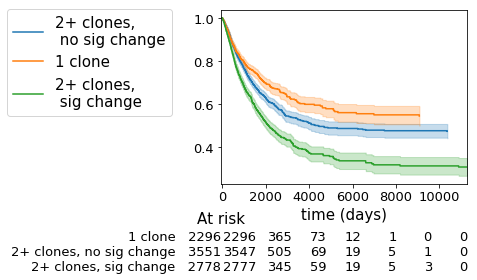

In [39]:
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='protected')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[(clonesig_res_all_protected.nb_clones>=2)&(clonesig_res_all_protected.pval>0.05)].index)
ix3 = (clonesig_res_all_protected[(clonesig_res_all_protected.nb_clones>=2)&(clonesig_res_all_protected.pval<=0.05)].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='2+ clones, no sig change')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)

kmf3.fit(clonesig_res_all_protected.survival_days[ix3], clonesig_res_all_protected.binary_vital_status[ix3], label='2+ clones, sig change')
ax = kmf3.plot(ax=ax)

ax.legend(fontsize=15, loc=2, bbox_to_anchor=(-0.9,1.05), labels=['2+ clones,\n no sig change', '1 clone', '2+ clones,\n sig change'])
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, kmf3, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_2_sig_protected_survival_tcga.pdf', bbox_inches='tight')


Then we look at survival curves for the whole TCGA, first distinguishing 1 or 2 clones and more, then 1, 2, and 3 clones and more, and finally 1, 2 clones with no significant signature change, or 2 clones with a significant signature change, for the **public** input SNVS

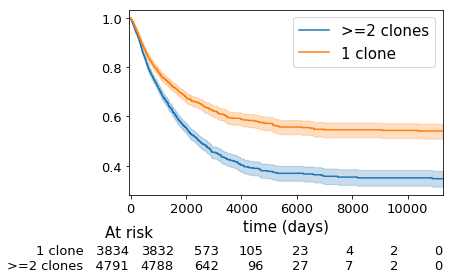

In [40]:
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='public')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones!=1].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='>=2 clones')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)


ax.legend(fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_2_public_survival_tcga.pdf', bbox_inches='tight')


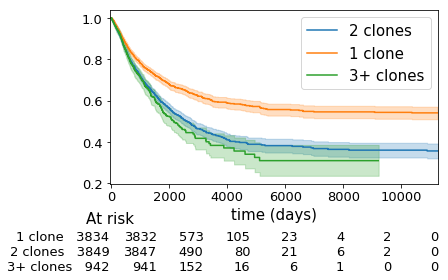

In [41]:
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='public')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==2].index)
ix3 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones>=3].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='2 clones')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)

kmf3.fit(clonesig_res_all_protected.survival_days[ix3], clonesig_res_all_protected.binary_vital_status[ix3], label='3+ clones')
ax = kmf3.plot(ax=ax)

ax.legend(fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, kmf3, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_3_public_survival_tcga.pdf', bbox_inches='tight')


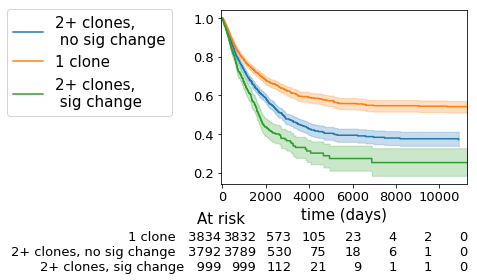

In [42]:
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='public')]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ix1 = (clonesig_res_all_protected[clonesig_res_all_protected.nb_clones==1].index)
ix2 = (clonesig_res_all_protected[(clonesig_res_all_protected.nb_clones>=2)&(clonesig_res_all_protected.pval>0.05)].index)
ix3 = (clonesig_res_all_protected[(clonesig_res_all_protected.nb_clones>=2)&(clonesig_res_all_protected.pval<=0.05)].index)

kmf2.fit(clonesig_res_all_protected.survival_days[ix2], clonesig_res_all_protected.binary_vital_status[ix2], label='2+ clones, no sig change')
ax = kmf2.plot()

kmf1.fit(clonesig_res_all_protected.survival_days[ix1], clonesig_res_all_protected.binary_vital_status[ix1], label='1 clone')
ax = kmf1.plot(ax=ax)

kmf3.fit(clonesig_res_all_protected.survival_days[ix3], clonesig_res_all_protected.binary_vital_status[ix3], label='2+ clones, sig change')
ax = kmf3.plot(ax=ax)

ax.legend(fontsize=15, loc=2, bbox_to_anchor=(-0.9,1.05), labels=['2+ clones,\n no sig change', '1 clone', '2+ clones,\n sig change'])
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel('time (days)', fontsize=15)

add_at_risk_counts(kmf1, kmf2, kmf3, ax=ax)
fig = plt.gcf()
fig.axes[1].tick_params(axis="x", labelsize=13)
fig.axes[1].set_xlabel('At risk', fontsize=15)
plt.savefig('20190801_paper_figures/nb_clones_2_sig_public_survival_tcga.pdf', bbox_inches='tight')


Now, one more exploration to see if the difference in survival is found in a cancer-type-specific way. It is not, maybe a problem of sample size and statistical power or Simpson's paradox

ACC
58 12
BLCA
117 147
BRCA
512 200
CESC
65 168
CHOL
21 4
COADREAD
83 318
DLBC
12 13
ESCA
65 76
GBM
83 202
HNSC
168 148
KICH
21 35
KIRC
170 23
KIRP
142 53
LGG
334 20
LIHC
178 102
LUAD
108 217
LUSC
103 180
MESO
48 5
OV
180 201
PAAD
75 18
PCPG
82 1
PRAD
232 18
SARC
130 45
SKCM
101 210
STAD
188 127
TGCT
30 5
THCA
126 9
THYM
20 28
UCEC
189 213
UCS
16 35
UVM
65 3


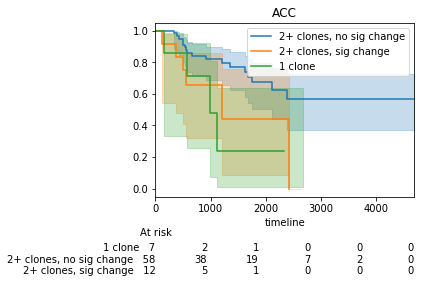

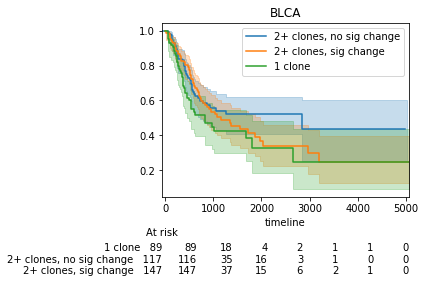

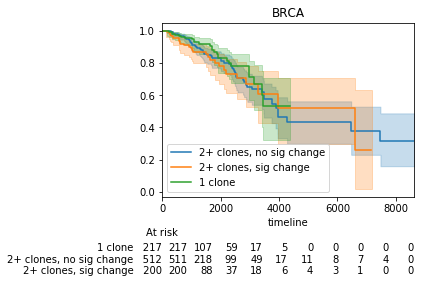

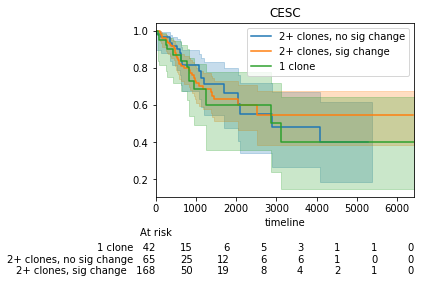

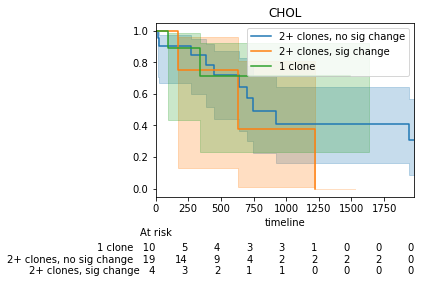

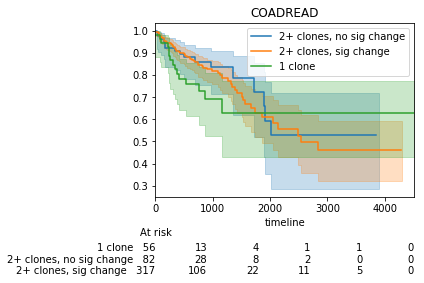

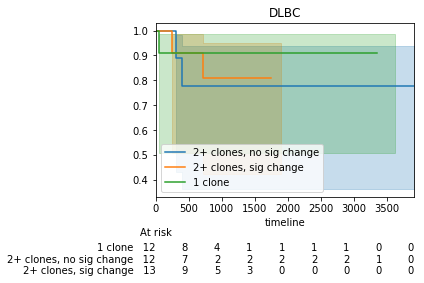

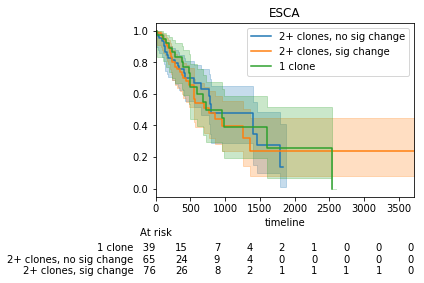

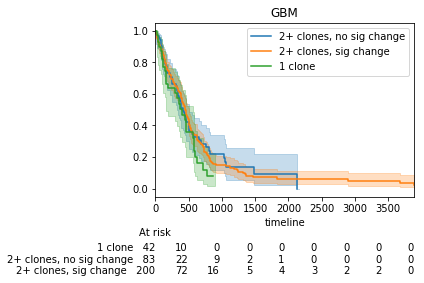

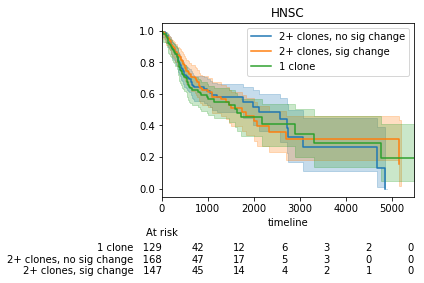

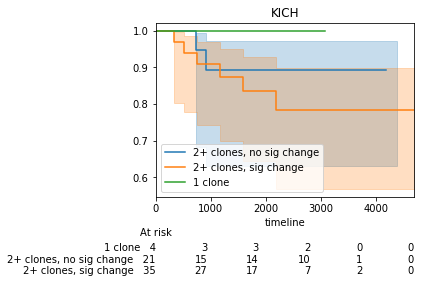

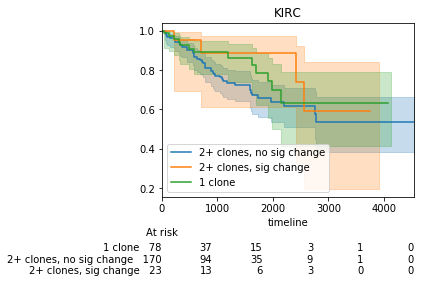

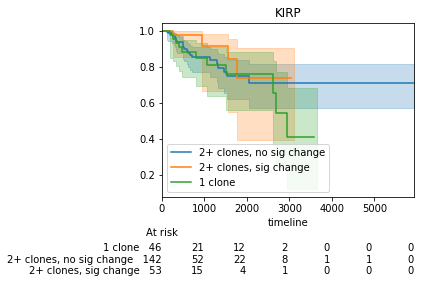

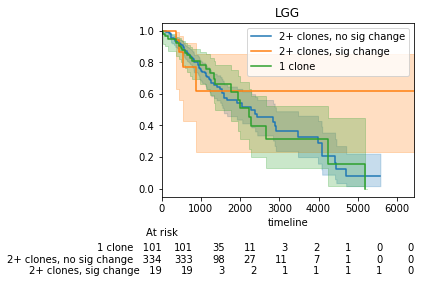

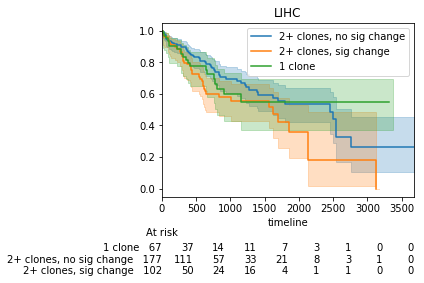

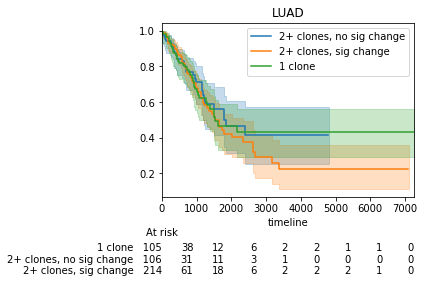

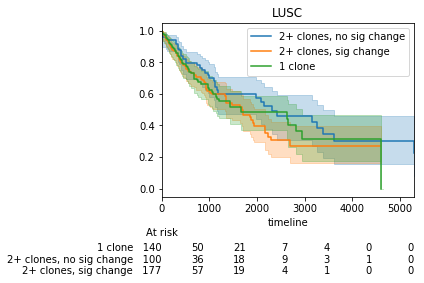

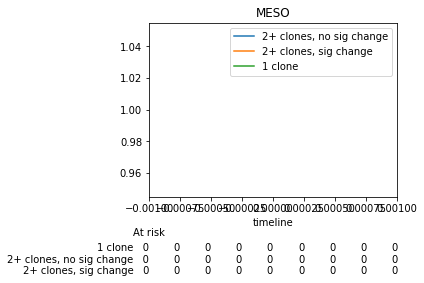

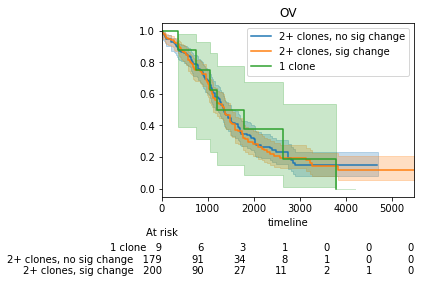

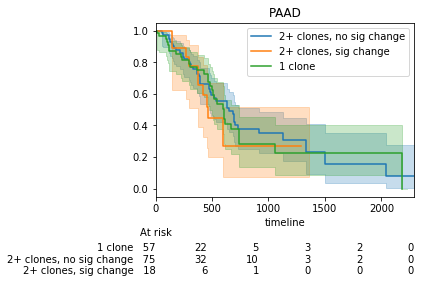

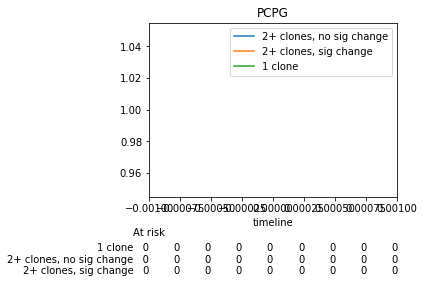

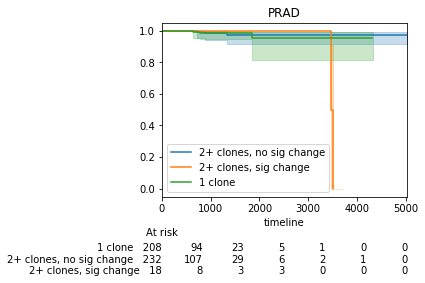

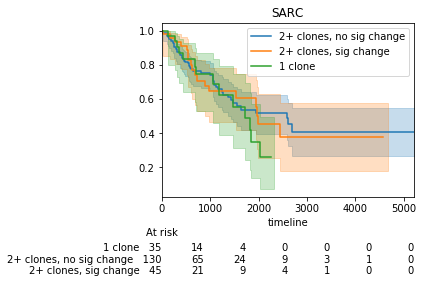

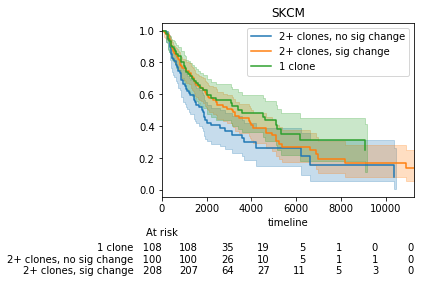

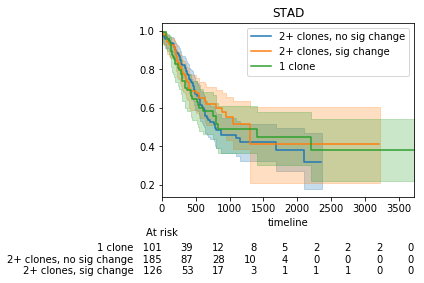

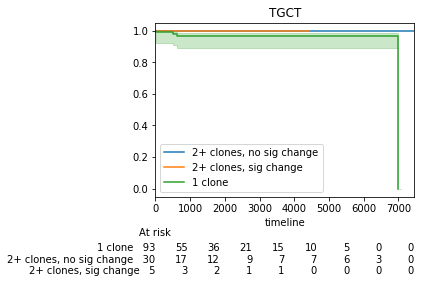

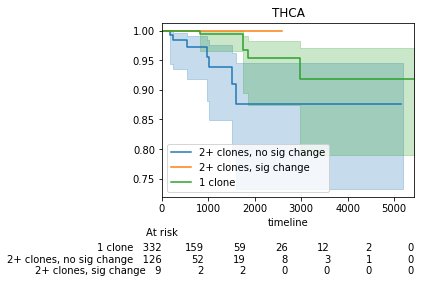

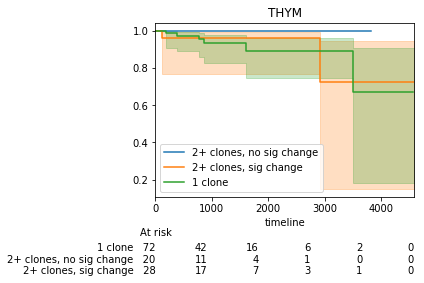

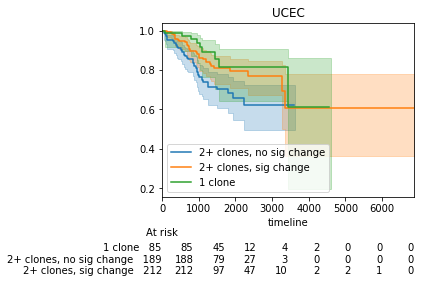

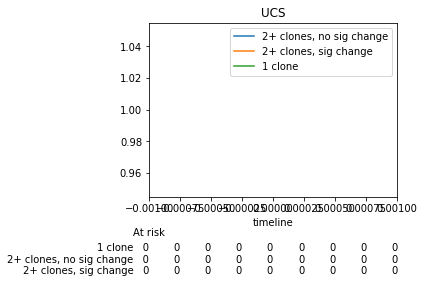

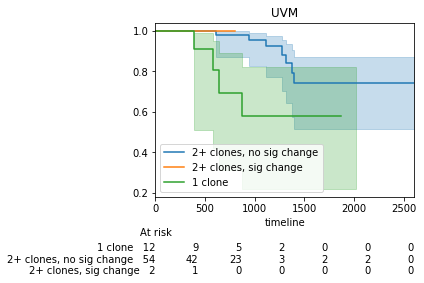

In [12]:
import lifelines
clonesig_res_all_protected = clonesig_res[(clonesig_res.mutation_set=='protected')]

for loc in clonesig_res_all_protected.cancer_loc_x.unique():
    print(loc)
    try:
        figure = plt.figure()
        restr_loc = clonesig_res_all_protected[clonesig_res_all_protected.cancer_loc_x==loc]
        kmf1 = KaplanMeierFitter()
        kmf2 = KaplanMeierFitter()
        kmf3 = KaplanMeierFitter()

        ix1 = (restr_loc[restr_loc.nb_clones==1].index)
        ix2 = (restr_loc[(restr_loc.nb_clones!=1) &(restr_loc.pval>0.05)].index)
        ix3 = (restr_loc[(restr_loc.nb_clones!=1) &(restr_loc.pval<=0.05)].index)
        print(len(ix2), len(ix3))


        kmf2.fit(restr_loc.survival_days[ix2], restr_loc.binary_vital_status[ix2], label='2+ clones, no sig change')
        ax=kmf2.plot()



        kmf3.fit(restr_loc.survival_days[ix3], restr_loc.binary_vital_status[ix3], label='2+ clones, sig change')
        kmf3.plot(ax=ax)
        
        kmf1.fit(restr_loc.survival_days[ix1], restr_loc.binary_vital_status[ix1], label='1 clone')
        kmf1.plot(ax=ax)


        from lifelines.plotting import add_at_risk_counts
        add_at_risk_counts(kmf1, kmf2, kmf3, ax=ax)
        ax.set_title(loc)
    except:
        print('not enough for', loc)

And finally an overview of which signatures change the most in each cancer type

ACC
BLCA
BRCA
CESC
CHOL
COADREAD
DLBC
ESCA
GBM
HNSC
KICH
KIRC
KIRP
LGG
LIHC
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
STAD
TGCT
THCA
THYM
UCEC
UCS
UVM


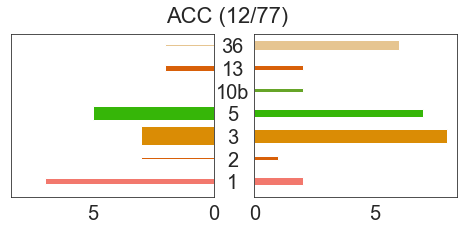

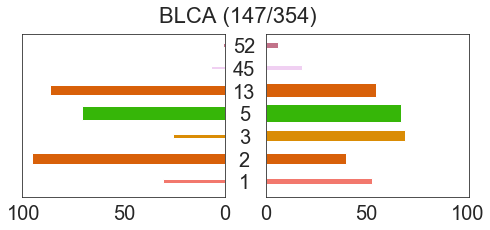

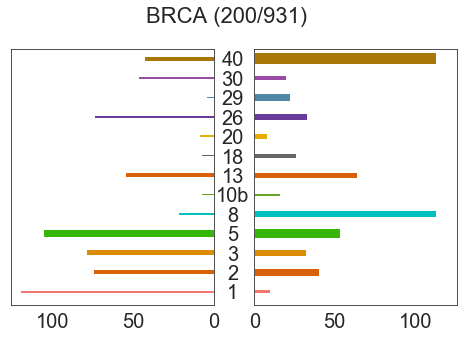

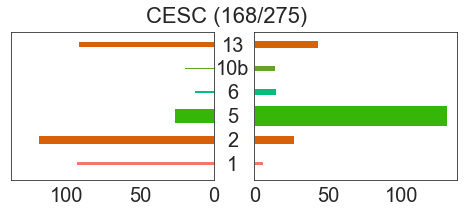

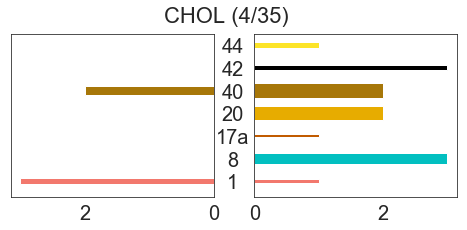

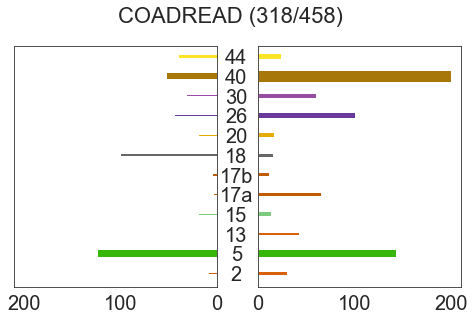

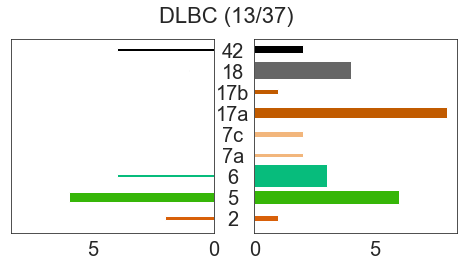

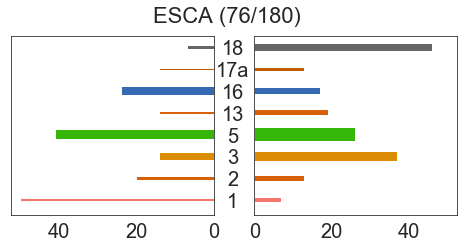

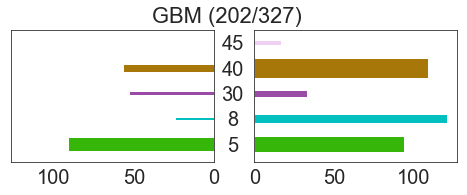

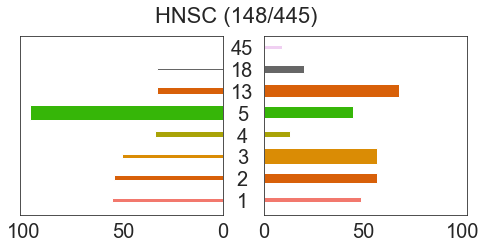

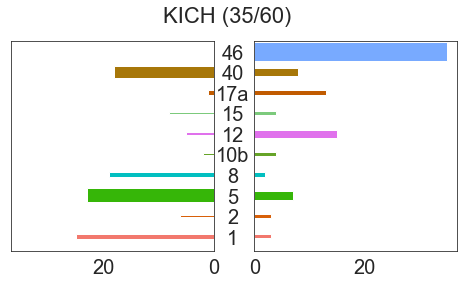

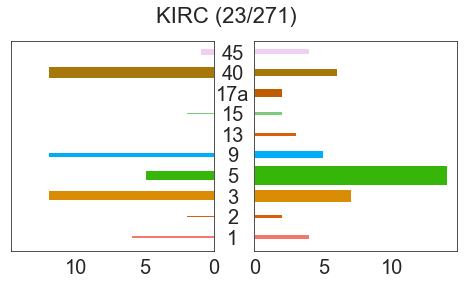

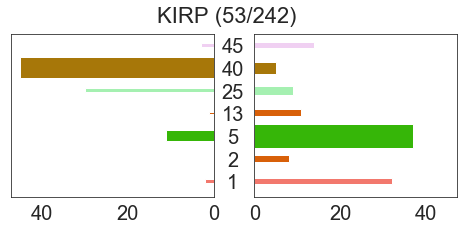

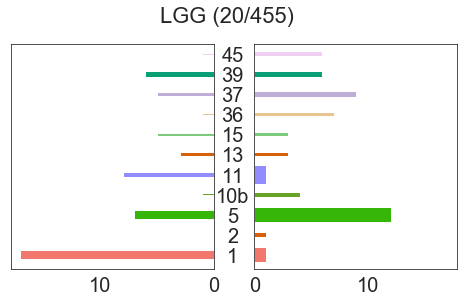

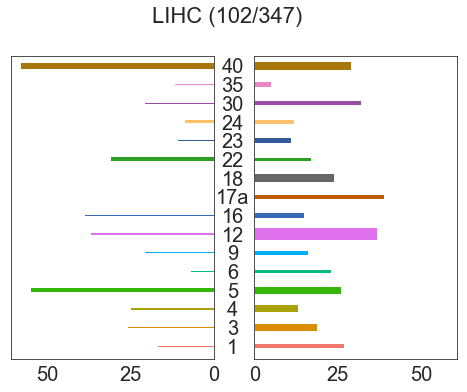

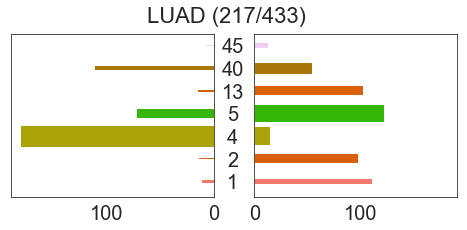

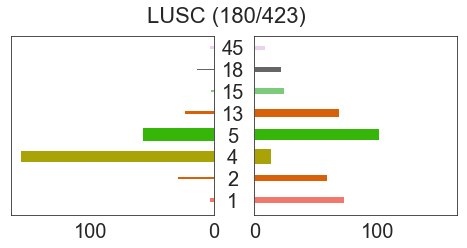

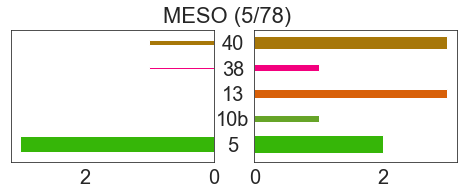

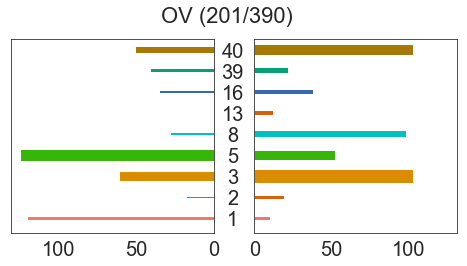

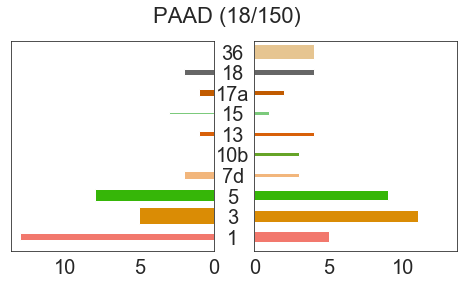

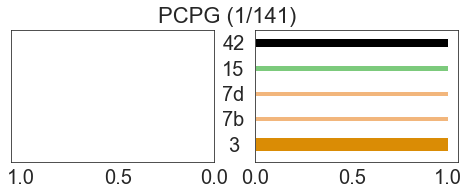

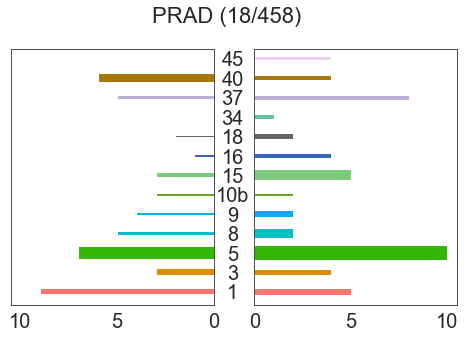

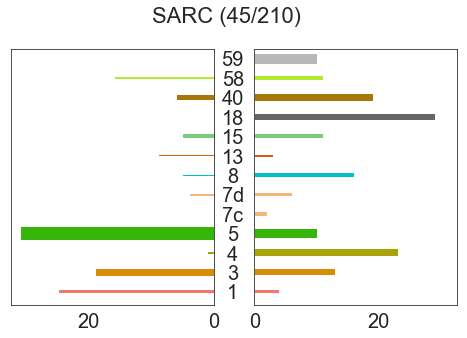

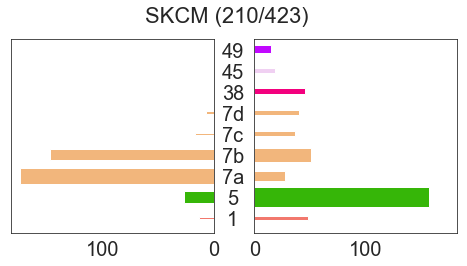

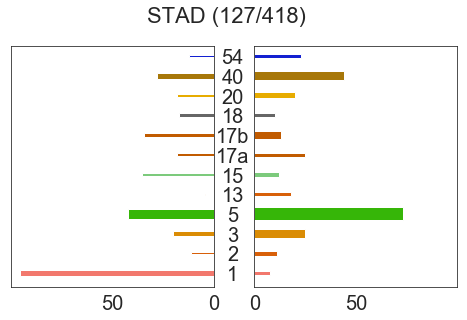

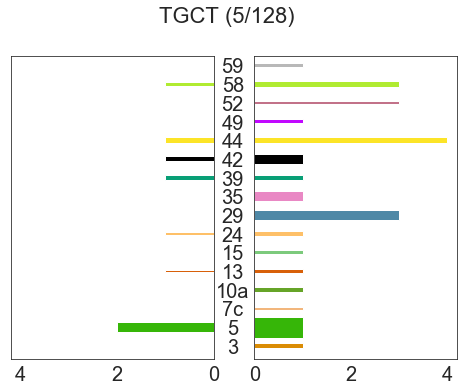

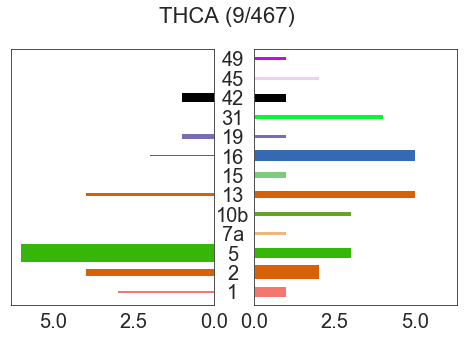

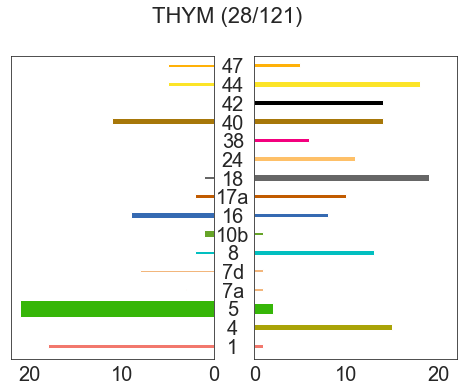

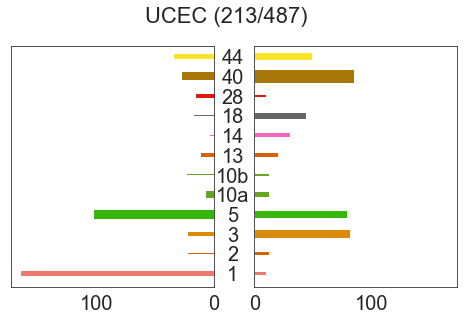

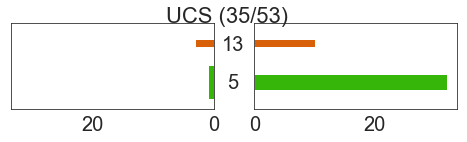

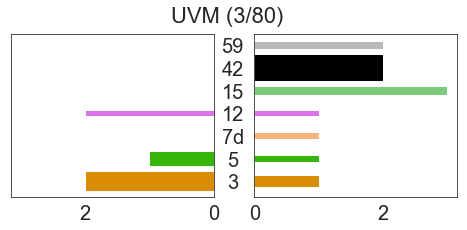

In [13]:
color_dict = collections.OrderedDict()
color_dict['SBS1']= '#F2786D'
color_dict['SBS2']= '#D86009'
color_dict['SBS13']= '#D86009'
color_dict['SBS3']= '#DA8C05'
color_dict['SBS4']= '#A9A307'
color_dict['SBS5']= '#36B608'
color_dict['SBS6']= '#07BC7C'
color_dict['SBS7a']= '#f2b67c'
color_dict['SBS7b']= '#f2b67c'
color_dict['SBS7c']= '#f2b67c'
color_dict['SBS7d']= '#f2b67c'
color_dict['SBS8']= '#02BFC0'
color_dict['SBS9']= '#00AEF7'
color_dict['SBS10a']= '#66A428'
color_dict['SBS10b']= '#66A428'
color_dict['SBS11']= '#938CFF'
color_dict['SBS12']= '#E071EC'
color_dict['SBS14']= '#F566BE'
color_dict['SBS15']= '#7CCA7C'
color_dict['SBS16']= '#356AB2'
color_dict['SBS17a']= '#C15B00'
color_dict['SBS17b']= '#C15B00'
color_dict['SBS18']= '#666666'
color_dict['SBS19']= '#756EB5'
color_dict['SBS20']= '#E7AC00'
color_dict['SBS21']= '#A5CEE4'
color_dict['SBS22']= '#2CA121'
color_dict['SBS23']= '#335a9c'
color_dict['SBS24']= '#FEC068'
color_dict['SBS25']= '#a5f0b1'
color_dict['SBS26']= '#6A399C'
color_dict['SBS28']= '#E71408'
color_dict['SBS29']= '#4e88a6'
color_dict['SBS30']= '#994BA5'
color_dict['SBS31']= '#0cf531'
color_dict['SBS33']= '#A75620'
color_dict['SBS34']= '#62C3A4'
color_dict['SBS35']= '#E988C4'
color_dict['SBS36']= '#E6C591'
color_dict['SBS37']= '#BEADD5'
color_dict['SBS38']= '#F3007E'
color_dict['SBS39']= '#089F76'
color_dict['SBS40']= '#A77709'
color_dict['SBS41']= '#a80526'
color_dict['SBS42']= 'black'
color_dict['SBS43']= '#6b088a'
color_dict['SBS44']= '#fce428'
color_dict['SBS45']= '#f0d0f2'
color_dict['SBS46']= '#78aaff'
color_dict['SBS47']= '#ffb108'
color_dict['SBS49']= '#c108ff'
color_dict['SBS52']= '#c27289'
color_dict['SBS54']= '#1320d1'
color_dict['SBS56']= '#e8dba2'
color_dict['SBS58']= '#b0eb31'
color_dict['SBS59']= '#b8b8b8'

sns.set_style('white')
for loc in clonesig_res.cancer_loc_x.unique():
    print(loc)
    sub_protected_chg = clonesig_res[(clonesig_res.mutation_set=='protected')&(clonesig_res.pval<0.05) & (clonesig_res.cancer_loc_x==loc)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
    sbs_names = [c.split('_')[1] for c in sub_protected_chg if 'subclonal_SBS' in c]
    bla = pd.DataFrame(sub_protected_chg[[c for c in sub_protected_chg if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg[[c for c in sub_protected_chg if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)

    final_table = bla[[c for i, c in enumerate(bla.columns) if np.abs(bla).sum(axis=0)[c]>0]]
    final_table[np.abs(final_table)<0.05] = 0
    final_table = final_table[[c for i, c in enumerate(final_table.columns) if np.abs(final_table>0).sum(axis=0)[c]>0.03*len(final_table)]]
    (final_table>0).sum(axis=0)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, final_table.shape[1]/3.5+1))
    plt.subplots_adjust(wspace = 0.2)
    axes[1].barh(y=np.arange(final_table.shape[1]), width=(final_table>0).sum(axis=0).to_frame().T.values[0], color=[color_dict[c] for c in (final_table>0).sum(axis=0).to_frame().T.columns], height= final_table[final_table>0].median(axis=0)*2+0.05)
    axes[0].barh(y=np.arange(final_table.shape[1]), width=(final_table<0).sum(axis=0).to_frame().T.values[0], color=[color_dict[c] for c in (final_table<0).sum(axis=0).to_frame().T.columns],  height= final_table[final_table<0].median(axis=0)*2+0.05)
    axes[0].invert_xaxis()

    fig.suptitle('{} ({}/{})'.format(sub_protected_chg.cancer_loc_x.unique()[0], len(sub_protected_chg), len(clonesig_res[(clonesig_res.mutation_set=='protected') & (clonesig_res.cancer_loc_x==loc)])), fontsize=22,y=1 + 0.05/final_table.shape[1])
    axes[1].set_yticks(range(len(final_table.columns)))
    axes[1].get_yaxis().set_tick_params(pad=18)
    axes[1].set_yticklabels([c.replace('SBS', '') for c in final_table.columns.tolist()], fontsize=20, ha='center')
    axes[0].set_ylim([-0.7, final_table.shape[1]-0.5])
    axes[1].set_ylim([-0.7, final_table.shape[1]-0.5])
    axes[0].set_yticks([])
    axes[1].tick_params(axis="x", labelsize=20)
    axes[0].tick_params(axis="x", labelsize=20)
    max_x = max([axes[1].get_xlim()[1], axes[0].get_xlim()[0]])
    axes[0].set_xlim([max_x, 0])
    axes[1].set_xlim([0, max_x])
    plt.savefig('20190801_paper_figures/{}_sig_trend.pdf'.format(loc), bbox_inches='tight')


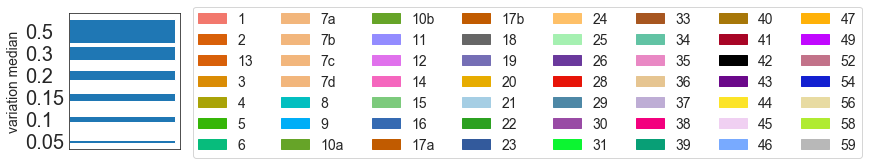

In [14]:

plt.figure(figsize=(2,6.0/4+1))
plt.barh(y=np.arange(6), width=[5]*6 , height=np.array([0.05, 0.1, 0.15, 0.2, 0.3, 0.5]) *2+0.05)
#axes[0].barh(y=np.arange(final_table.shape[1]), width=(final_table<0).sum(axis=0).to_frame().T.values[0], color=[color_dict[c] for c in (final_table<0).sum(axis=0).to_frame().T.columns],  height= final_table[final_table<0].median(axis=0)+0.05)
plt.gca().get_yaxis().set_tick_params(pad=40)
plt.gca().set_yticks(range(6))
plt.gca().set_yticklabels([str(np.round(i, 2)) for i in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]], fontsize=20, ha='left')
plt.gca().set_xticklabels([])
plt.gca().set_ylabel('variation median', fontsize=14)

patchList = []
for key in color_dict.keys():
        data_key = Patch(color=color_dict[key], label=key.replace('SBS', ''))
        patchList.append(data_key)

plt.legend(handles=patchList, loc=2, bbox_to_anchor=(1.05, 1.1), ncol=8, fontsize=14)
plt.savefig('20190801_paper_figures/legend_sig_trend.pdf'.format(loc), bbox_inches='tight')


In [15]:
final_table[final_table<0].median(axis=0)*2+0.05

SBS3    -0.876379
SBS5    -0.636302
SBS7d         NaN
SBS12   -0.284199
SBS15         NaN
SBS42         NaN
SBS59         NaN
dtype: float64

## Type specific analysis
For each cancer type, we analyse the association of signature variation with other clinical variables, such as the stage of the primary tumor (staging_pt), the global stage (staging_global), the gender of the patient (SEX), the smoking history (TOBACCO_SMOKING_HISTORY_INDICATOR), and sometimes, some type-specific grade.
### ACC

In [16]:
clonesig_res_acc = clonesig_res[clonesig_res.cancer_loc_x=='ACC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/ACC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'Female': 'r', 'Male': 'b'}


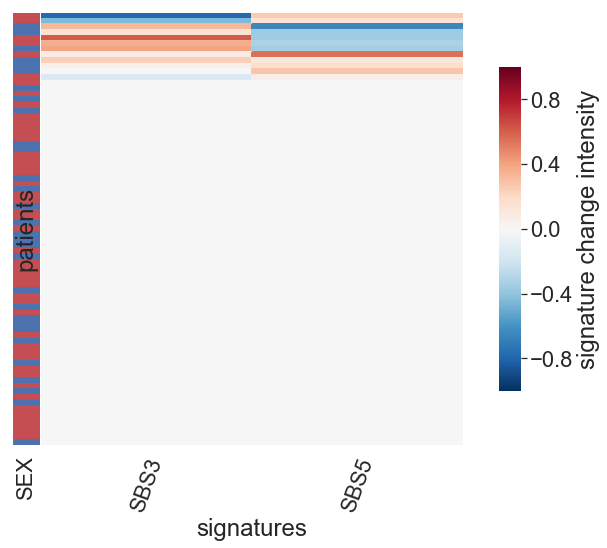

In [17]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_acc[(clonesig_res_acc.mutation_set=='protected')&(clonesig_res_acc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'b', 'I': 'g', '[Not vailable]': 'k', 'IV': 'y'}


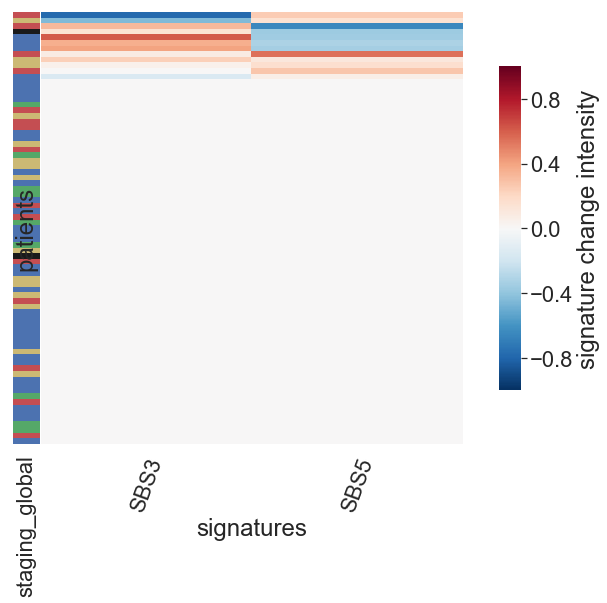

In [18]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_acc[(clonesig_res_acc.mutation_set=='protected')&(clonesig_res_acc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### BLCA

In [19]:
clonesig_res_blca = clonesig_res[clonesig_res.cancer_loc_x=='BLCA'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/BLCA/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'Female': 'b', 'Male': 'r'}


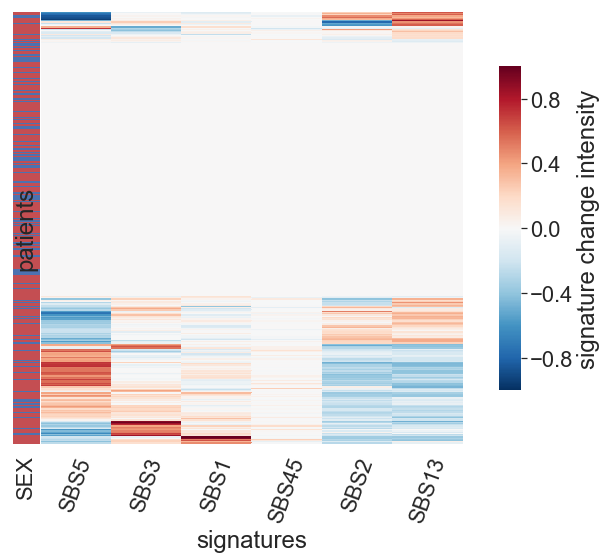

In [20]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_blca[(clonesig_res_blca.mutation_set=='protected')&(clonesig_res_blca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'b', '[Not vailable]': 'y', 'IV': 'g'}


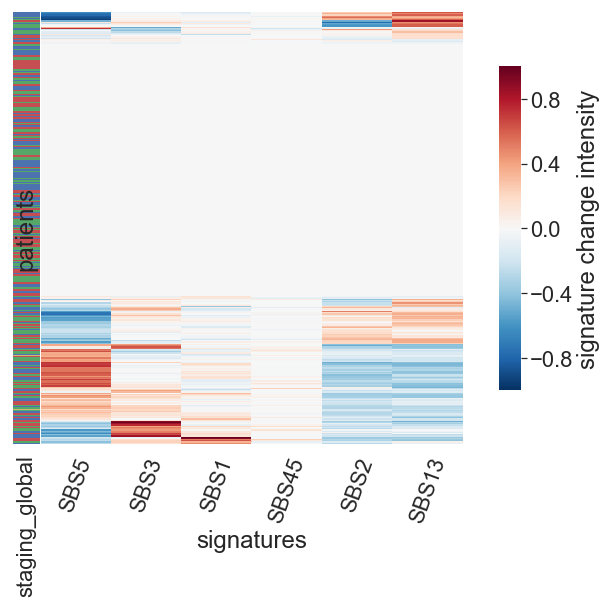

In [21]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_blca[(clonesig_res_blca.mutation_set=='protected')&(clonesig_res_blca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



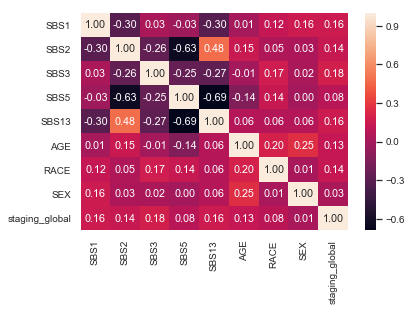

In [22]:
sub_protected_chg = clonesig_res_blca[(clonesig_res_blca.mutation_set=='protected')&(clonesig_res_blca.pval<0.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

final_bla = bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>4]]
final_bla_b = final_bla.copy()
#final_bla_b[final_bla<-0.1] = -1
#final_bla_b[final_bla>0.1] = 1
#final_bla_b[np.abs(final_bla)<= 0.1] = 0
final_bla_b = final_bla_b.assign(SEX=sub_protected_chg_m.SEX,
                                RACE=sub_protected_chg_m.RACE,
                                staging_global=sub_protected_chg_m.staging_global,
                                AGE=sub_protected_chg_m.AGE_x.astype(float))
from dython import nominal
sns.set(font_scale=0.9)
nominal.associations(final_bla_b, nominal_columns=['SEX', 'staging_pt', 'RACE', 'staging_global', 'WEISS_SCORE_OVERALL'], mark_columns=False, theil_u=True, plot=True,
                          return_results = False)


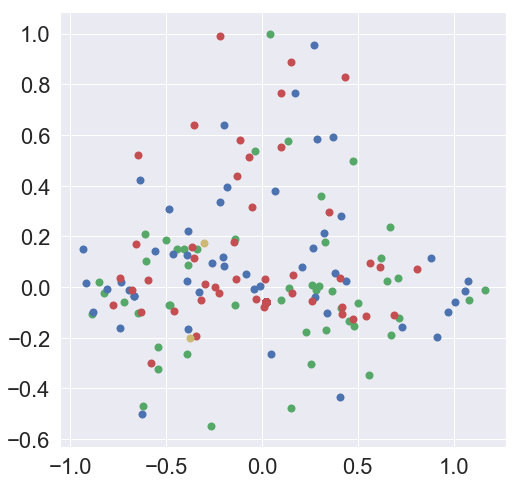

In [23]:
from sklearn.decomposition import PCA
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_blca[(clonesig_res_blca.mutation_set=='protected')&(clonesig_res_blca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]])
colors = {'IV': 'g', 'II': 'b', 'III': 'r', '[Not vailable]': 'y'}

plt.figure(figsize=(8, 8))
for val in ('IV', 'II', 'III', '[Not vailable]'):
    plt.scatter(X_pca[sub_protected_chg_m.staging_global == val, 0], X_pca[sub_protected_chg_m.staging_global == val, 1],
                color=colors[val], lw=2, label=val)


### BRCA

In [24]:
clonesig_res_brca = clonesig_res[clonesig_res.cancer_loc_x=='BRCA'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/BRCA/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'III': 'r', 'II': 'b', 'X': 'y', 'I': 'g', 'IV': 'k'}


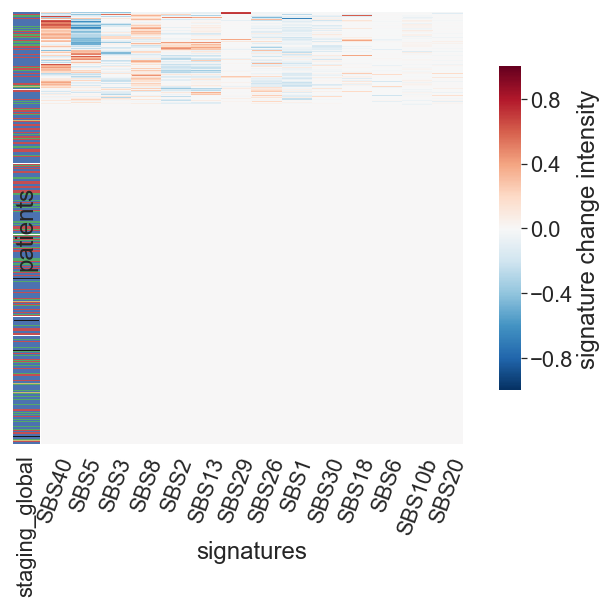

In [25]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_brca[(clonesig_res_brca.mutation_set=='protected')&(clonesig_res_brca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



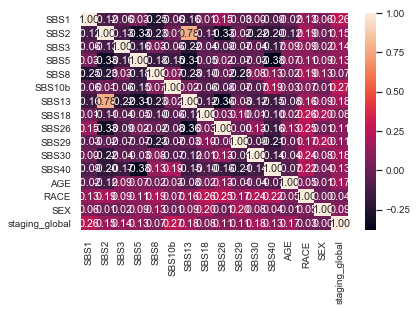

In [26]:
sub_protected_chg = clonesig_res_brca[(clonesig_res_brca.mutation_set=='protected')&(clonesig_res_brca.pval<0.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

final_bla = bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>4]]
final_bla_b = final_bla.copy()
#final_bla_b[final_bla<-0.1] = -1
#final_bla_b[final_bla>0.1] = 1
#final_bla_b[np.abs(final_bla)<= 0.1] = 0
final_bla_b = final_bla_b.assign(SEX=sub_protected_chg_m.SEX,
                                RACE=sub_protected_chg_m.RACE,
                                staging_global=sub_protected_chg_m.staging_global,
                                AGE=sub_protected_chg_m.AGE_x.astype(float))
from dython import nominal
sns.set(font_scale=0.9)
nominal.associations(final_bla_b, nominal_columns=['SEX', 'staging_pt', 'RACE', 'staging_global', 'WEISS_SCORE_OVERALL'], mark_columns=False, theil_u=True, plot=True,
                          return_results = False)


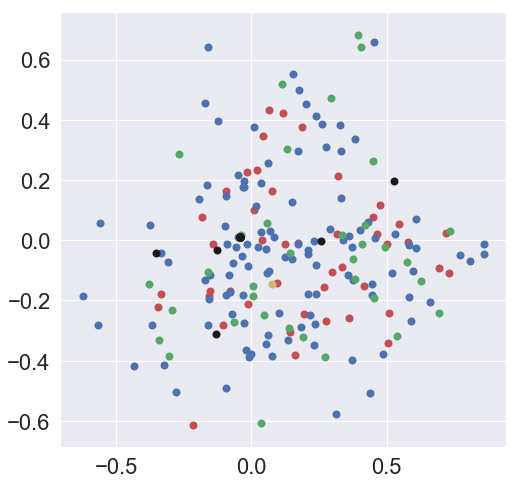

In [27]:
from sklearn.decomposition import PCA
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_brca[(clonesig_res_brca.mutation_set=='protected')&(clonesig_res_brca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]])
colors = {'IV': 'k', 'II': 'b', 'III': 'r', 'I': 'g', 'X': 'y'}

plt.figure(figsize=(8, 8))
for val in colors.keys():
    plt.scatter(X_pca[sub_protected_chg_m.staging_global == val, 0], X_pca[sub_protected_chg_m.staging_global == val, 1],
                color=colors[val], lw=2, label=val)


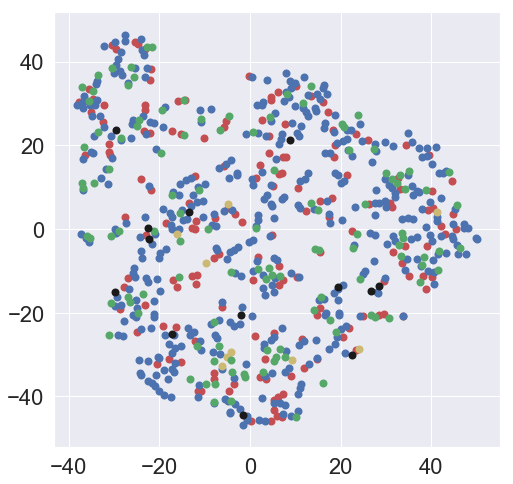

In [28]:
from sklearn.decomposition import PCA
from sklearn import manifold
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_brca[(clonesig_res_brca.mutation_set=='protected')&(clonesig_res_brca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=15)
XX = sub_protected_chg_m[['clonal_{}'.format(c) for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]+['subclonal_{}'.format(c) for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]]
X_tsne = tsne.fit_transform(XX.dropna())
colors = {'IV': 'k', 'II': 'b', 'III': 'r', 'I': 'g', 'X': 'y'}

plt.figure(figsize=(8, 8))
for val in colors.keys():
    plt.scatter(X_tsne[sub_protected_chg_m.dropna(subset=['subclonal_{}'.format(c) for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]).staging_global == val, 0], X_tsne[sub_protected_chg_m.dropna(subset=['subclonal_{}'.format(c) for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]).staging_global == val, 1],
                color=colors[val], lw=2, label=val)


### CESC

In [29]:
clonesig_res_cesc = clonesig_res[clonesig_res.cancer_loc_x=='CESC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/CESC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'T1': 'r', 'T2': 'g', 'TX': 'k', 'T3': 'b', '[N': 'y'}


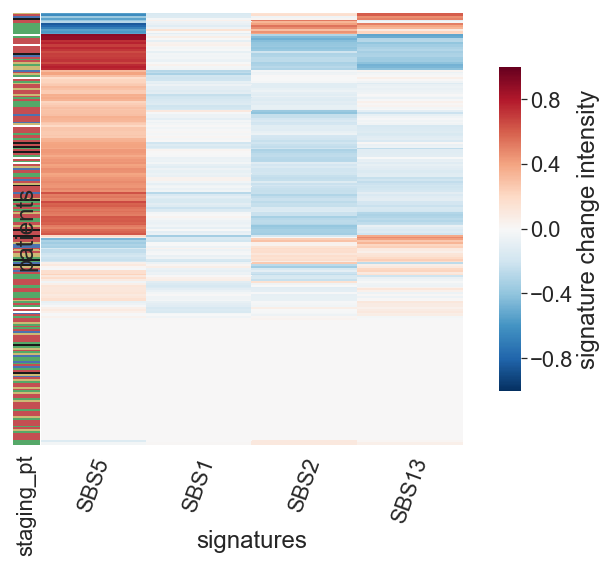

In [30]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_cesc[(clonesig_res_cesc.mutation_set=='protected')&(clonesig_res_cesc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'2': 'g', '[Not Available]': 'y', '3': 'k', '1': 'r', '4': 'b'}


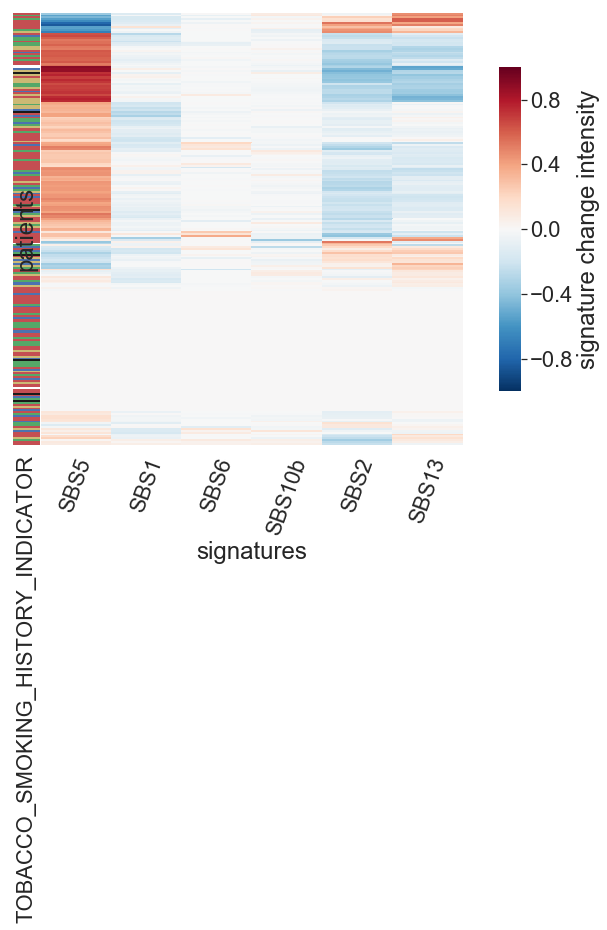

In [31]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_cesc[(clonesig_res_cesc.mutation_set=='protected')&(clonesig_res_cesc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>3]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### CHOL

In [32]:
clonesig_res_chol = clonesig_res[clonesig_res.cancer_loc_x=='CHOL'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/CHOL/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'T1': 'b', 'T2': 'r', 'T3': 'g'}


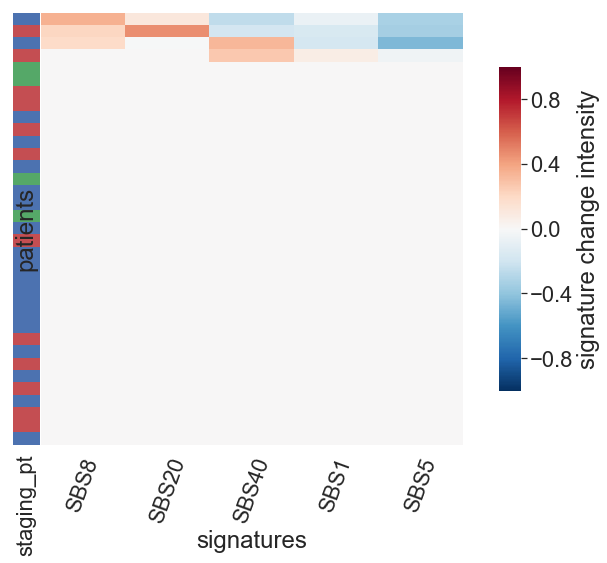

In [33]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_chol[(clonesig_res_chol.mutation_set=='protected')&(clonesig_res_chol.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.3]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



### COADREAD

In [34]:
clonesig_res_coadread = clonesig_res[clonesig_res.cancer_loc_x=='COADREAD'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/COADREAD/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'Female': 'r', 'Male': 'b'}


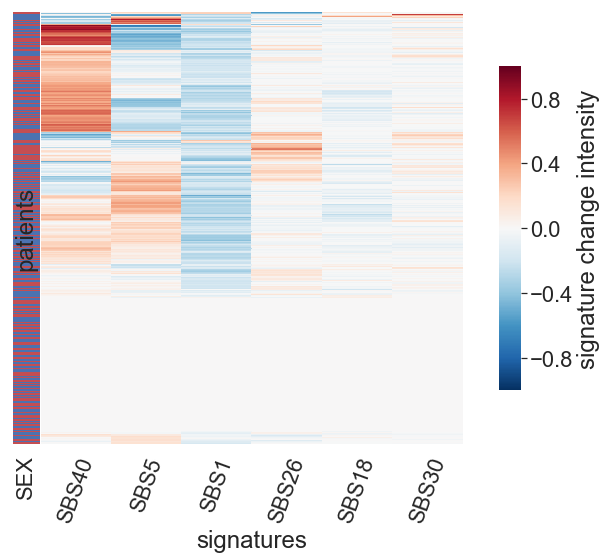

In [35]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_coadread[(clonesig_res_coadread.mutation_set=='protected')&(clonesig_res_coadread.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'g', 'T2': 'b', 'T4': 'k', 'T3': 'r', 'Ti': 'y'}


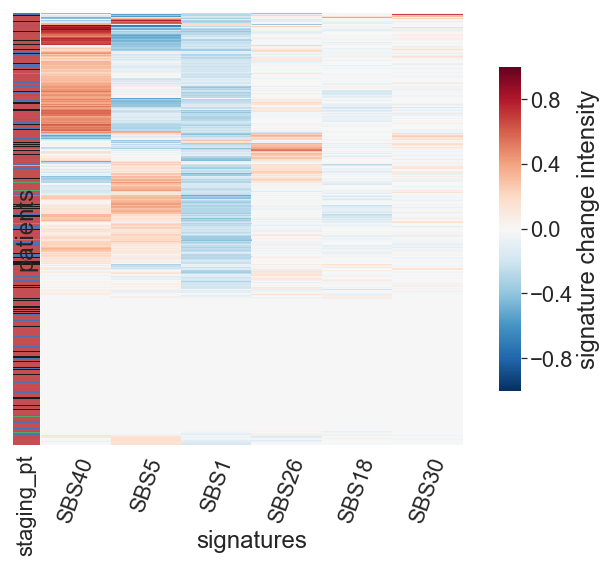

In [36]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_coadread[(clonesig_res_coadread.mutation_set=='protected')&(clonesig_res_coadread.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'b', 'I': 'g', '[Not vailable]': 'k', 'IV': 'y'}


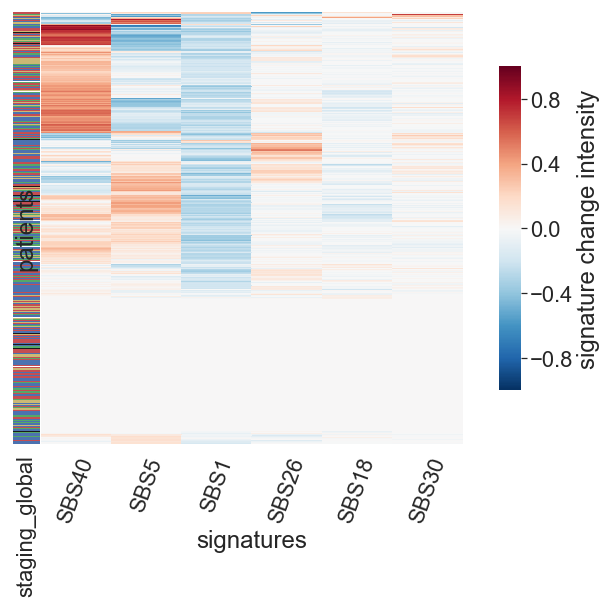

In [37]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_coadread[(clonesig_res_coadread.mutation_set=='protected')&(clonesig_res_coadread.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



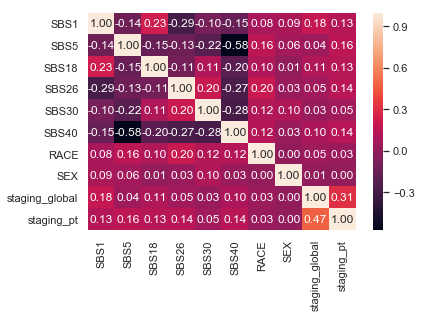

In [38]:
sub_protected_chg = clonesig_res_coadread[(clonesig_res_coadread.mutation_set=='protected')&(clonesig_res_coadread.pval<0.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

final_bla = bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]]
final_bla_b = final_bla.copy()
#final_bla_b[final_bla<-0.1] = -1
#final_bla_b[final_bla>0.1] = 1
#final_bla_b[np.abs(final_bla)<= 0.1] = 0
final_bla_b = final_bla_b.assign(SEX=sub_protected_chg_m.SEX,
                                 staging_pt=sub_protected_chg_m.staging_pt,
                                RACE=sub_protected_chg_m.RACE,
                                staging_global=sub_protected_chg_m.staging_global)
from dython import nominal
sns.set(font_scale=1)
nominal.associations(final_bla_b, nominal_columns=['SEX', 'staging_pt', 'RACE', 'staging_global', 'GRADE'], mark_columns=False, theil_u=True, plot=True,
                          return_results = False)


### DLBC

In [44]:
clonesig_res_dlbc = clonesig_res[clonesig_res.cancer_loc_x=='DLBC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/DLBC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'Female': 'r', 'Male': 'b'}


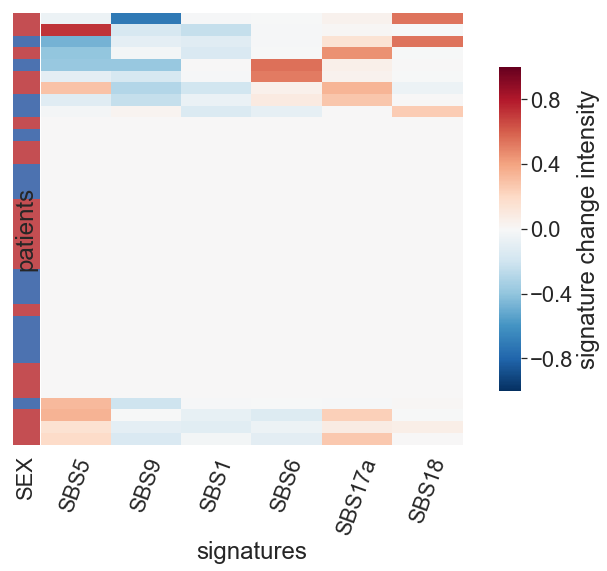

In [45]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_dlbc[(clonesig_res_dlbc.mutation_set=='protected')&(clonesig_res_dlbc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'[Not pplicable]': 'r'}


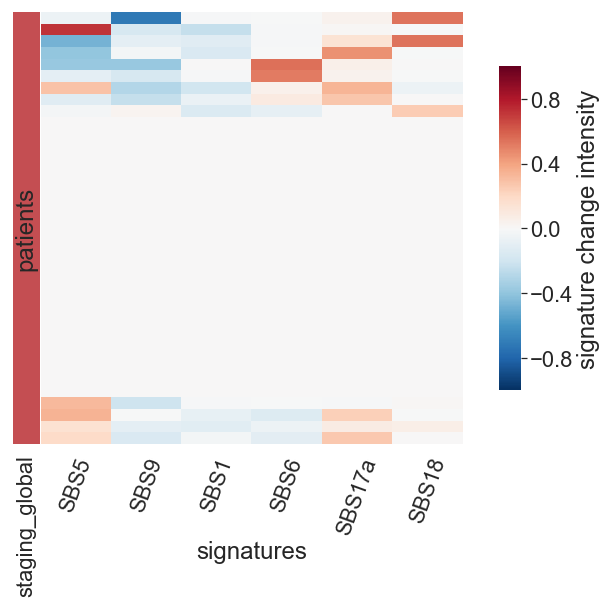

In [46]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_dlbc[(clonesig_res_dlbc.mutation_set=='protected')&(clonesig_res_dlbc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### ESCA

In [47]:
clonesig_res_esca = clonesig_res[clonesig_res.cancer_loc_x=='ESCA'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/ESCA/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))



{'Female': 'r', 'Male': 'b'}


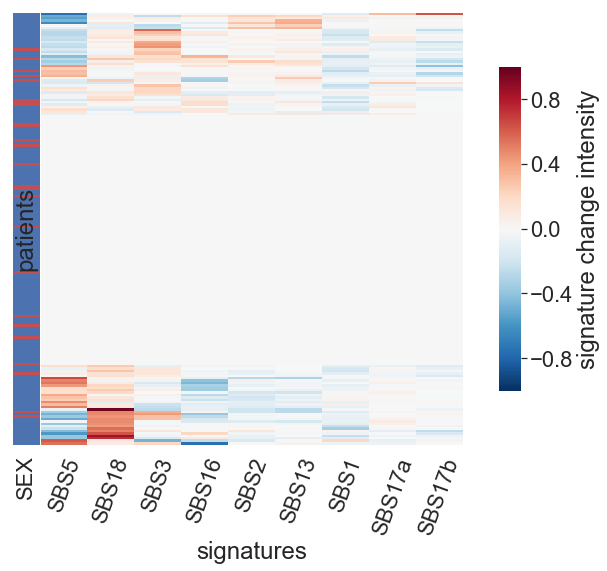

In [48]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_esca[(clonesig_res_esca.mutation_set=='protected')&(clonesig_res_esca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'r', 'T2': 'k', 'T4': 'y', 'T3': 'g', '[N': 'b'}


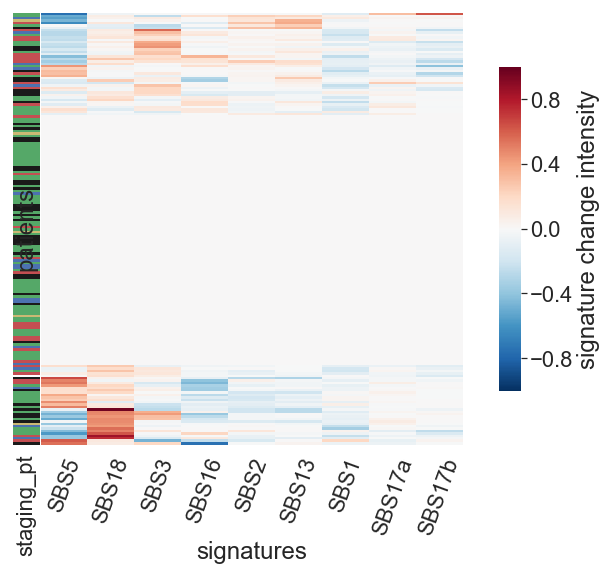

In [50]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_esca[(clonesig_res_esca.mutation_set=='protected')&(clonesig_res_esca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'g', 'II': 'y', 'I': 'r', '[Not vailable]': 'b', 'IV': 'k'}


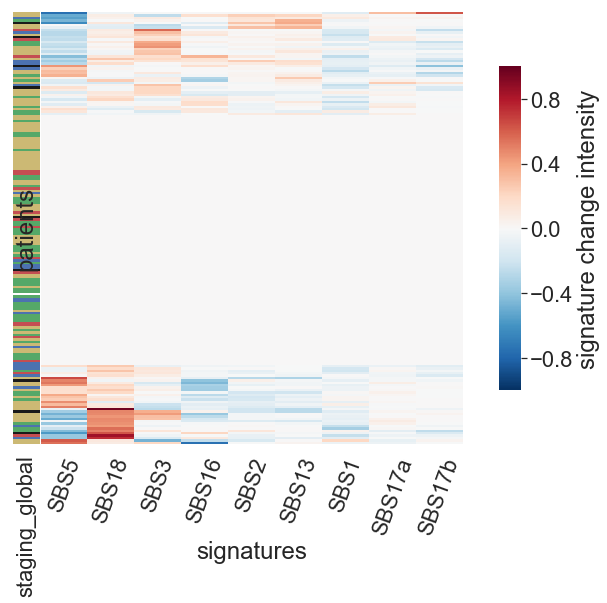

In [51]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_esca[(clonesig_res_esca.mutation_set=='protected')&(clonesig_res_esca.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### GBM

In [54]:
clonesig_res_gbm = clonesig_res[clonesig_res.cancer_loc_x=='GBM'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/GBM/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)



{'Female': 'b', 'Male': 'r'}


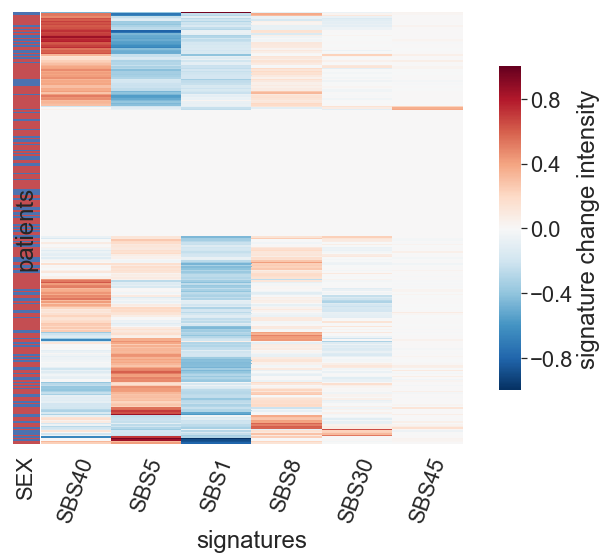

In [55]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_gbm[(clonesig_res_gbm.mutation_set=='protected')&(clonesig_res_gbm.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



### HNSC

In [56]:
clonesig_res_hnsc = clonesig_res[clonesig_res.cancer_loc_x=='HNSC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/HNSC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'r', 'Male': 'b'}


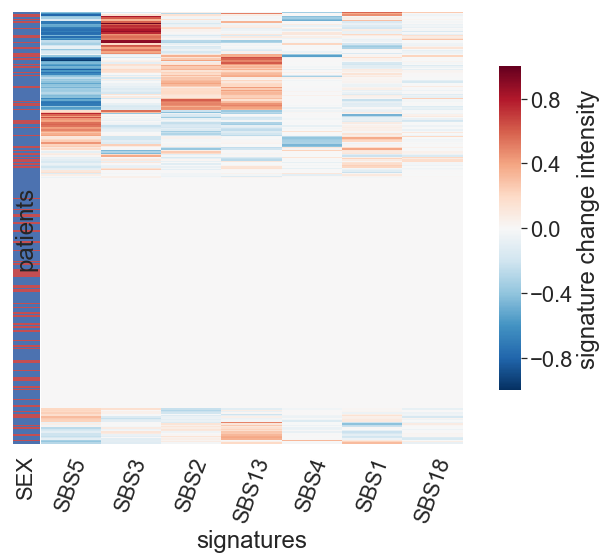

In [57]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_hnsc[(clonesig_res_hnsc.mutation_set=='protected')&(clonesig_res_hnsc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>5]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



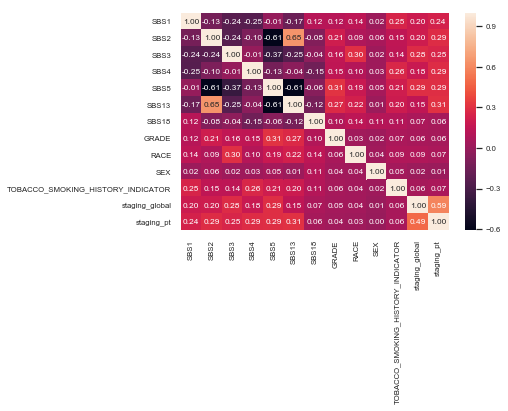

In [58]:
sub_protected_chg = clonesig_res_hnsc[(clonesig_res_hnsc.mutation_set=='protected')&(clonesig_res_hnsc.pval<0.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

final_bla = bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>5]]
final_bla_b = final_bla.copy()
#final_bla_b[final_bla<-0.1] = -1
#final_bla_b[final_bla>0.1] = 1
#final_bla_b[np.abs(final_bla)<= 0.1] = 0
final_bla_b = final_bla_b.assign(SEX=sub_protected_chg_m.SEX,
                                 staging_pt=sub_protected_chg_m.staging_pt,
                                RACE=sub_protected_chg_m.RACE,
                                staging_global=sub_protected_chg_m.staging_global,
                                TOBACCO_SMOKING_HISTORY_INDICATOR=sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR,
                                GRADE=sub_protected_chg_m.GRADE)
from dython import nominal
sns.set(font_scale=0.7)
nominal.associations(final_bla_b, nominal_columns=['SEX', 'staging_pt', 'RACE', 'staging_global', 'TOBACCO_SMOKING_HISTORY_INDICATOR', 'GRADE', 'HISTOLOGICAL_SUBTYPE', 'OCCUPATION_PRIMARY_CHEMICAL_EXPOSURE'], mark_columns=False, theil_u=True, plot=True,
                          return_results = False)


{'T1': 'b', 'TX': 'g', 'T4': 'r', 'T3': 'k', '[N': 'y'}


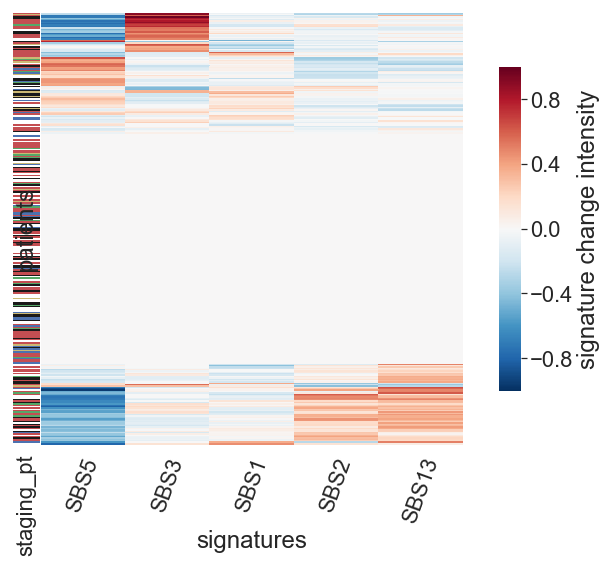

In [59]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_hnsc[(clonesig_res_hnsc.mutation_set=='protected')&(clonesig_res_hnsc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'y', 'II': 'k', 'I': 'b', '[Not vailable]': 'g', 'IV': 'r'}


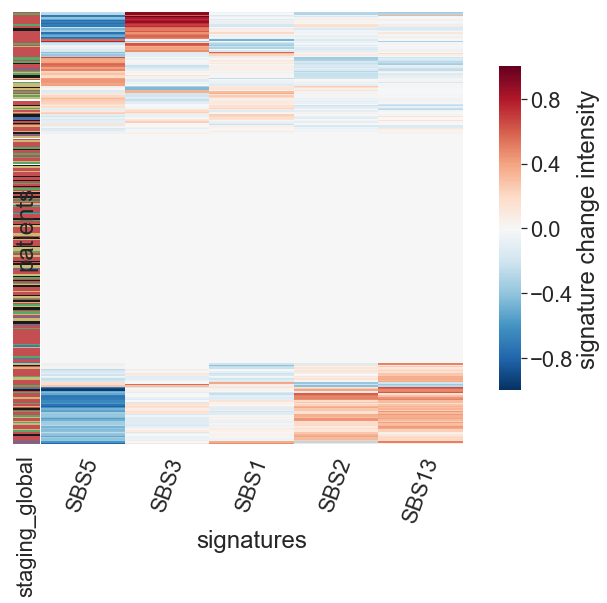

In [60]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_hnsc[(clonesig_res_hnsc.mutation_set=='protected')&(clonesig_res_hnsc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### KICH

In [61]:
clonesig_res_kich = clonesig_res[clonesig_res.cancer_loc_x=='KICH'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/KICH/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


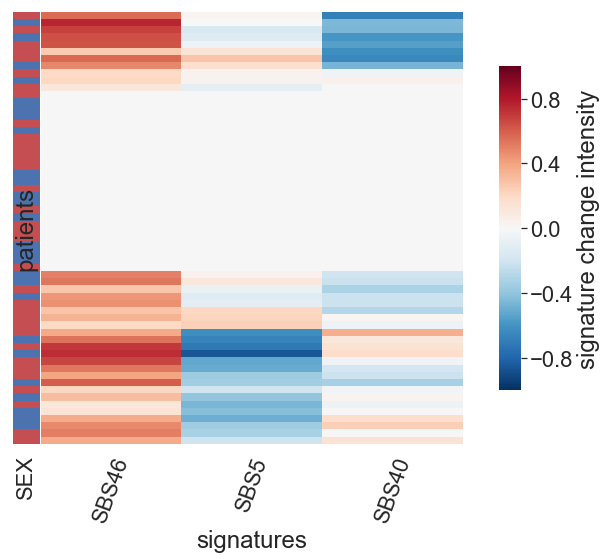

In [62]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kich[(clonesig_res_kich.mutation_set=='protected')&(clonesig_res_kich.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>5]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'g', 'T2': 'r', 'T4': 'k', 'T3': 'b'}


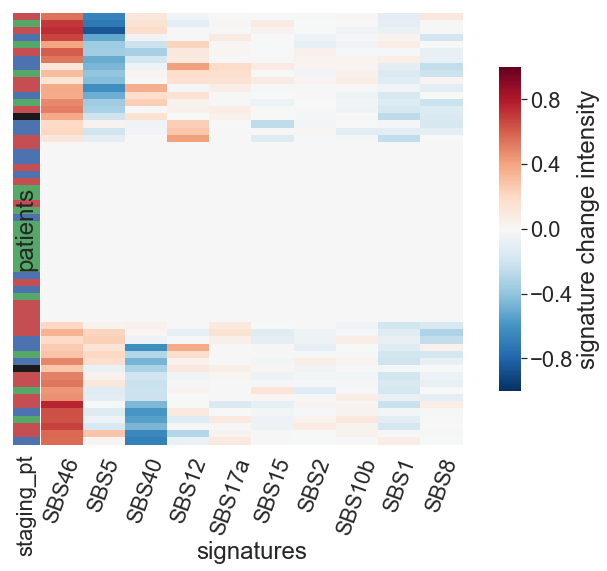

In [64]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kich[(clonesig_res_kich.mutation_set=='protected')&(clonesig_res_kich.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'b', 'II': 'r', 'I': 'g', 'IV': 'y'}


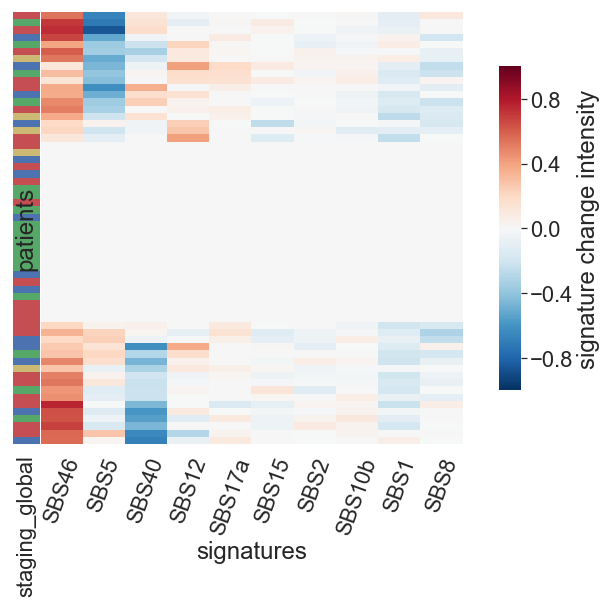

In [66]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kich[(clonesig_res_kich.mutation_set=='protected')&(clonesig_res_kich.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### KIRC

In [67]:
clonesig_res_kirc = clonesig_res[clonesig_res.cancer_loc_x=='KIRC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/KIRC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'MALE': 'g', 'Male': 'r'}


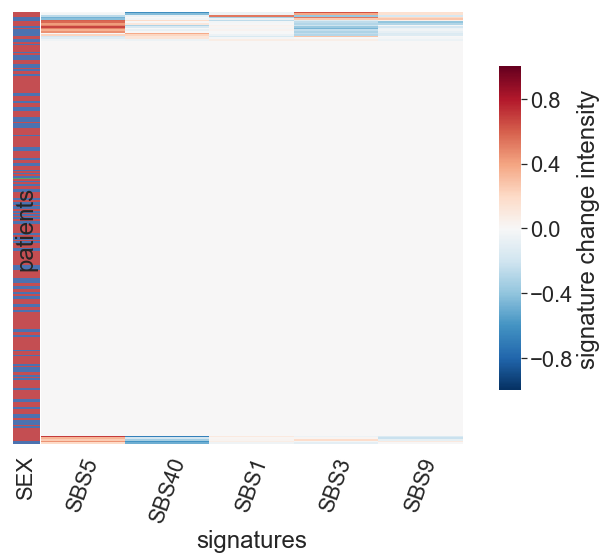

In [72]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirc[(clonesig_res_kirc.mutation_set=='protected')&(clonesig_res_kirc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'r', 'T2': 'g', 'T4': 'k', 'T3': 'b'}


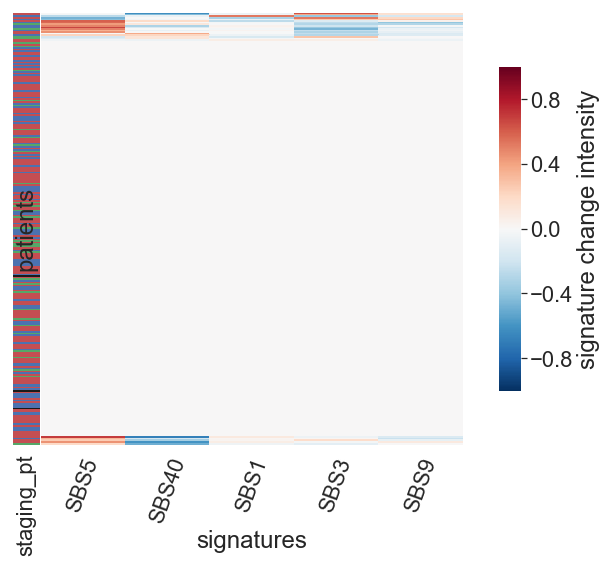

In [71]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirc[(clonesig_res_kirc.mutation_set=='protected')&(clonesig_res_kirc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{nan: 'r'}


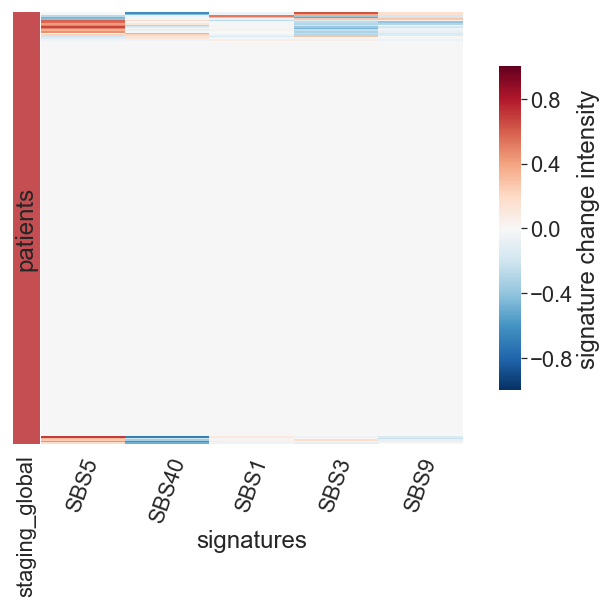

In [77]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirc[(clonesig_res_kirc.mutation_set=='protected')&(clonesig_res_kirc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### KIRP

In [73]:
clonesig_res_kirp = clonesig_res[clonesig_res.cancer_loc_x=='KIRP'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/KIRP/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


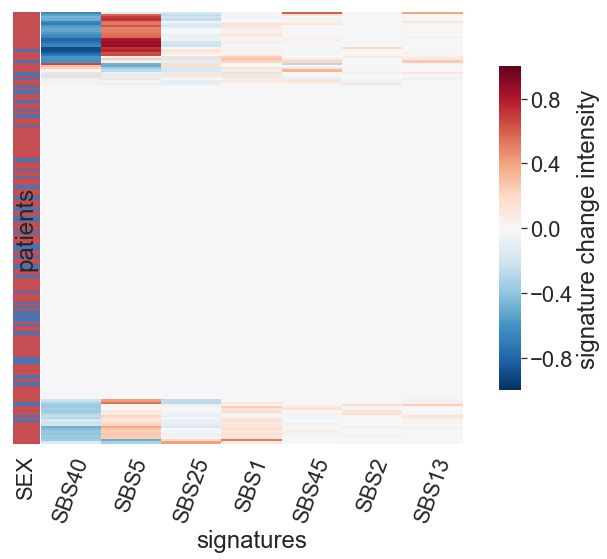

In [74]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirp[(clonesig_res_kirp.mutation_set=='protected')&(clonesig_res_kirp.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'r', 'T2': 'b', 'T4': 'k', 'T3': 'g'}


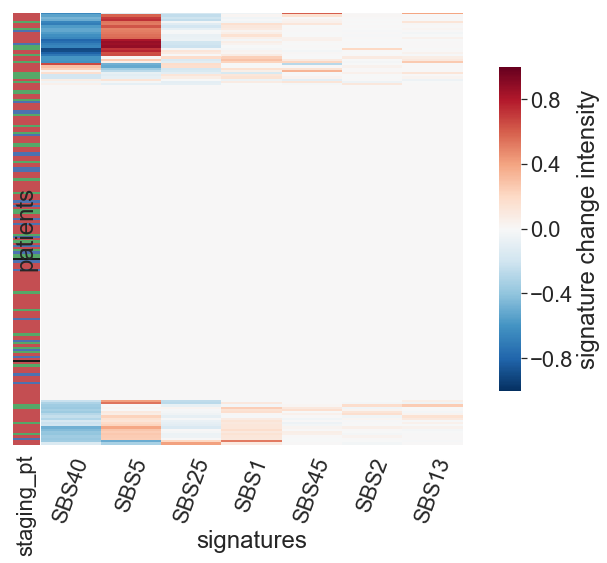

In [75]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirp[(clonesig_res_kirp.mutation_set=='protected')&(clonesig_res_kirp.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'k', 'II': 'g', 'I': 'r', '[Not vailable]': 'b', 'IV': 'y'}


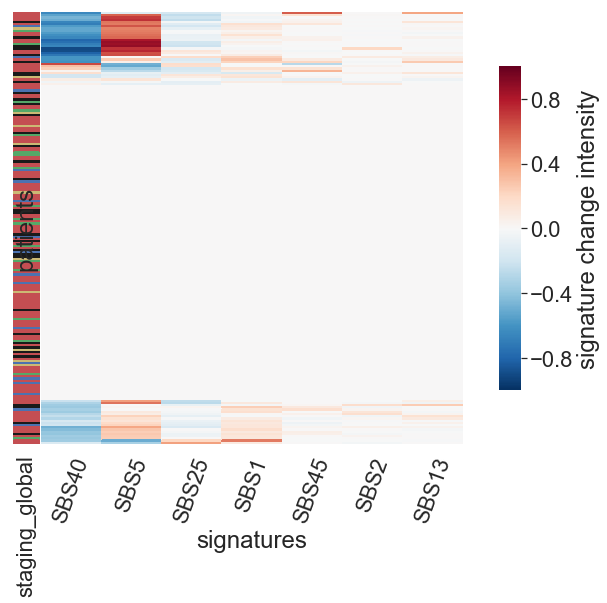

In [76]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_kirp[(clonesig_res_kirp.mutation_set=='protected')&(clonesig_res_kirp.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>1]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### LGG

In [80]:
clonesig_res_lgg = clonesig_res[clonesig_res.cancer_loc_x=='LGG'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/LGG/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
#clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'G3': 'b', 'G2': 'r', '[Discrepancy]': 'g'}


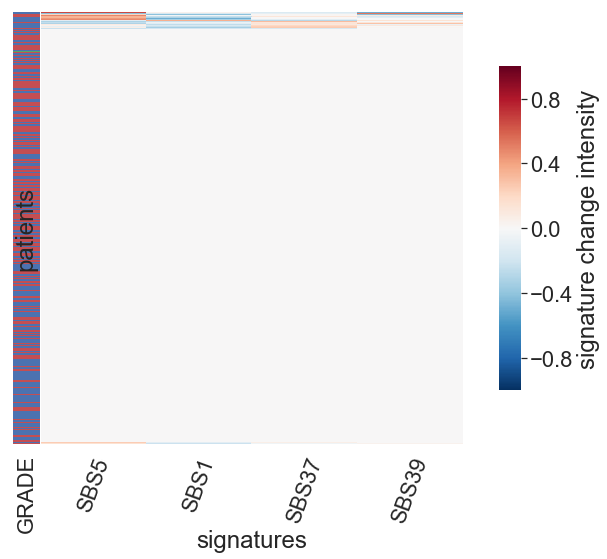

In [82]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lgg[(clonesig_res_lgg.mutation_set=='protected')&(clonesig_res_lgg.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.GRADE.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.GRADE.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



{'Female': 'r', 'Male': 'b'}


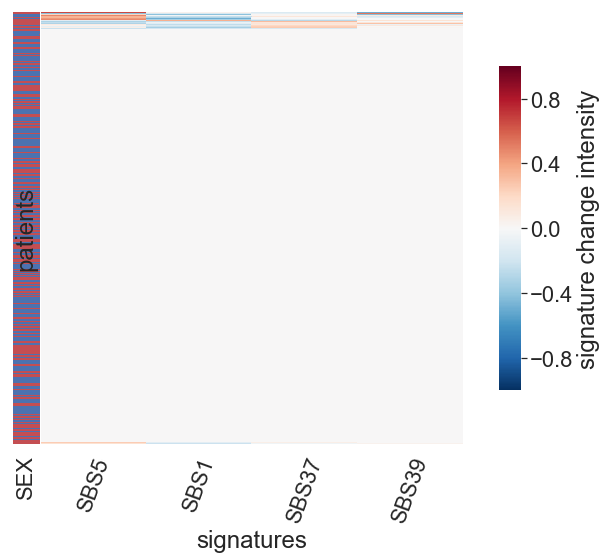

In [83]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lgg[(clonesig_res_lgg.mutation_set=='protected')&(clonesig_res_lgg.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



### LIHC

In [84]:
clonesig_res_lihc = clonesig_res[clonesig_res.cancer_loc_x=='LIHC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/LIHC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


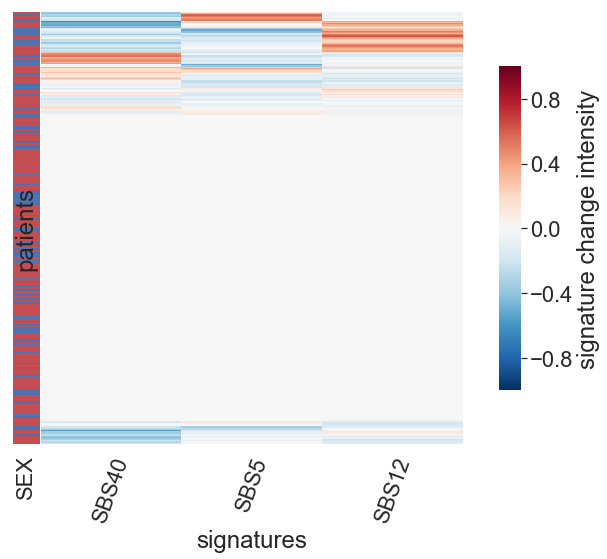

In [85]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lihc[(clonesig_res_lihc.mutation_set=='protected')&(clonesig_res_lihc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'g', 'T2': 'r', 'T4': 'y', 'T3': 'b', '[D': 'k'}


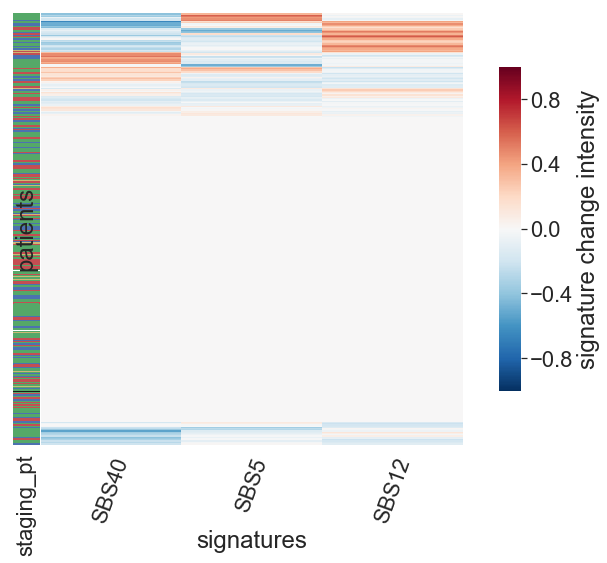

In [86]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lihc[(clonesig_res_lihc.mutation_set=='protected')&(clonesig_res_lihc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'[Not Available]': 'y', 'ASIAN': 'r', 'AMERICAN INDIAN OR ALASKA NATIVE': 'k', 'BLACK OR AFRICAN AMERICAN': 'b', 'WHITE': 'g'}


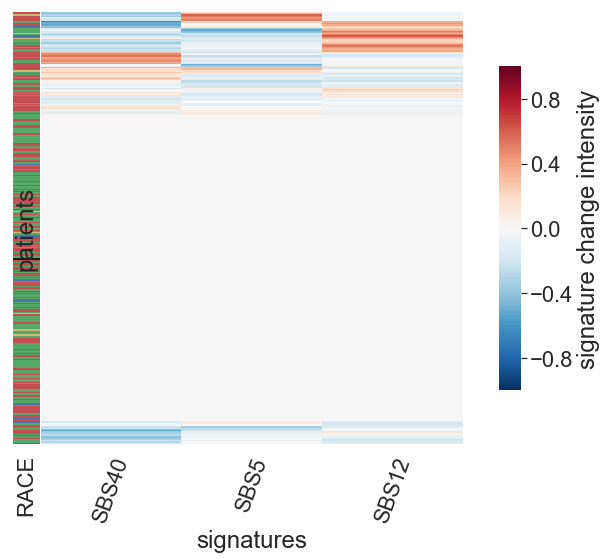

In [87]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lihc[(clonesig_res_lihc.mutation_set=='protected')&(clonesig_res_lihc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.RACE.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.RACE.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### LUAD

In [88]:
clonesig_res_luad = clonesig_res[clonesig_res.cancer_loc_x=='LUAD'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/LUAD/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'MALE': 'g', 'Male': 'r'}


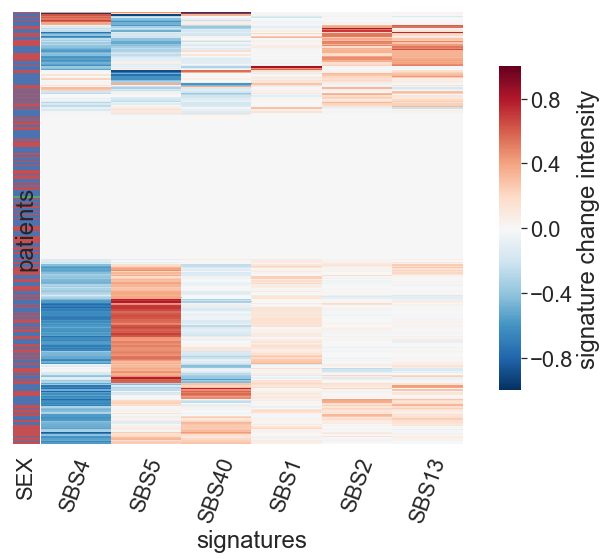

In [89]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_luad[(clonesig_res_luad.mutation_set=='protected')&(clonesig_res_luad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'k', 'T2': 'r', 'T4': 'b', 'T3': 'g'}


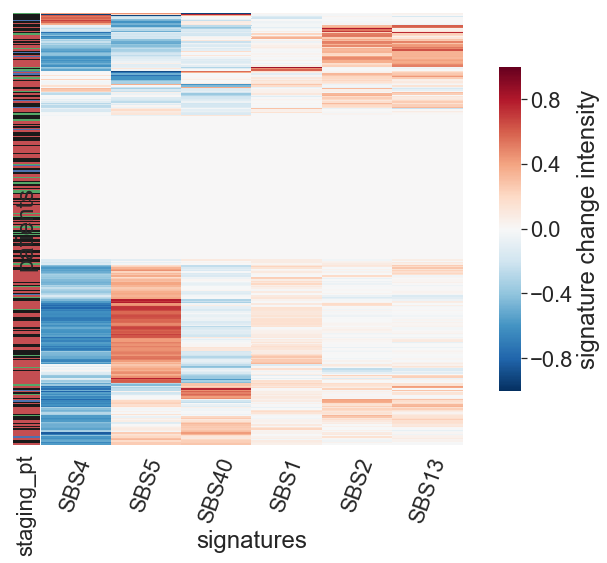

In [90]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_luad[(clonesig_res_luad.mutation_set=='protected')&(clonesig_res_luad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'y', 'II': 'g', '[Discrepancy]': 'k', 'I': 'r', 'IV': 'b'}


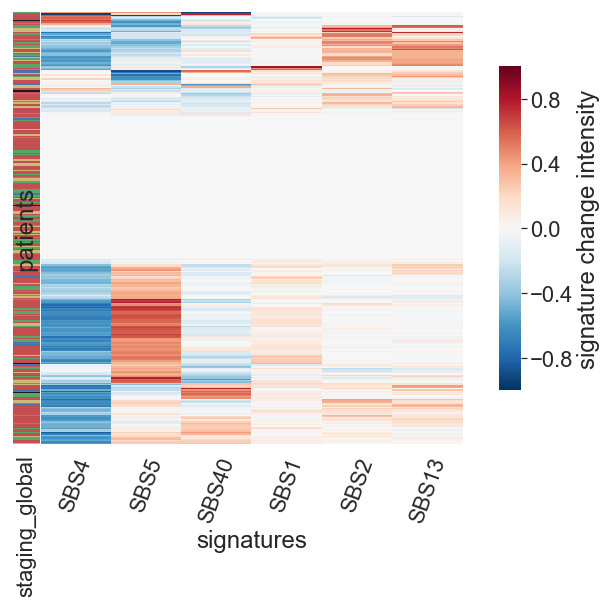

In [92]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_luad[(clonesig_res_luad.mutation_set=='protected')&(clonesig_res_luad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



{'2': 'y', '4': 'g', '5': 'k', '1': 'r', '3': 'b'}


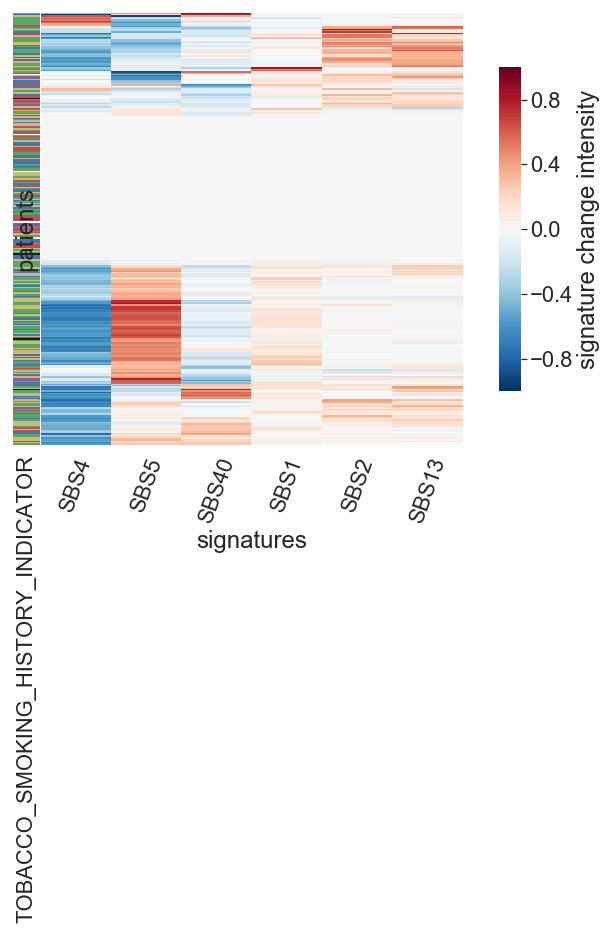

In [93]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_luad[(clonesig_res_luad.mutation_set=='protected')&(clonesig_res_luad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### LUSC

In [94]:
clonesig_res_lusc = clonesig_res[clonesig_res.cancer_loc_x=='LUSC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/LUSC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


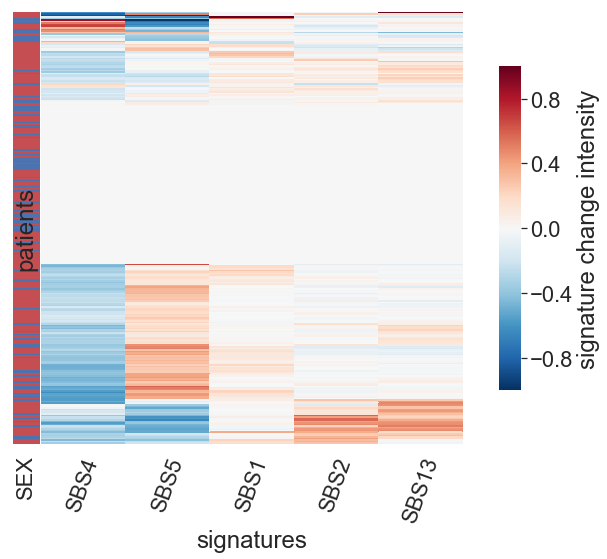

In [95]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lusc[(clonesig_res_lusc.mutation_set=='protected')&(clonesig_res_lusc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'r', 'T2': 'b', 'T4': 'k', 'T3': 'g'}


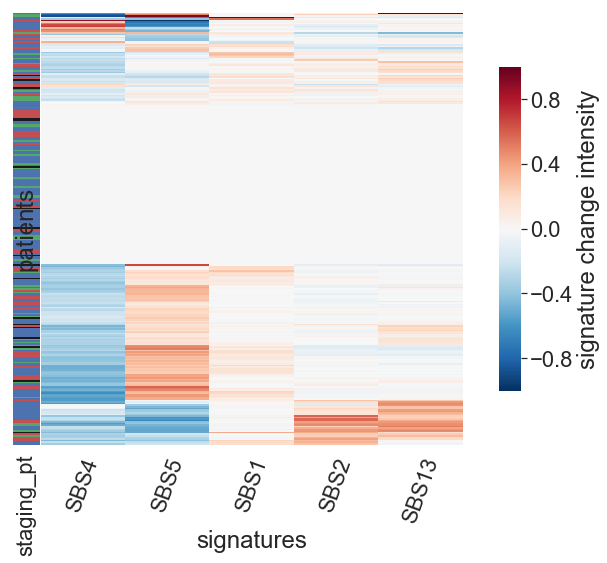

In [96]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lusc[(clonesig_res_lusc.mutation_set=='protected')&(clonesig_res_lusc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'g', 'II': 'b', '[Discrepancy]': 'k', 'I': 'r', 'IV': 'y'}


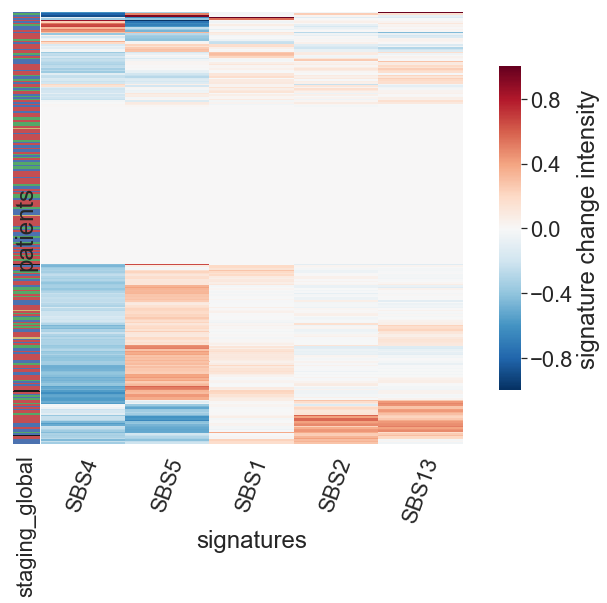

In [97]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lusc[(clonesig_res_lusc.mutation_set=='protected')&(clonesig_res_lusc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



{'2': 'b', '5': 'y', '[Not Available]': 'k', '3': 'r', '4': 'g'}


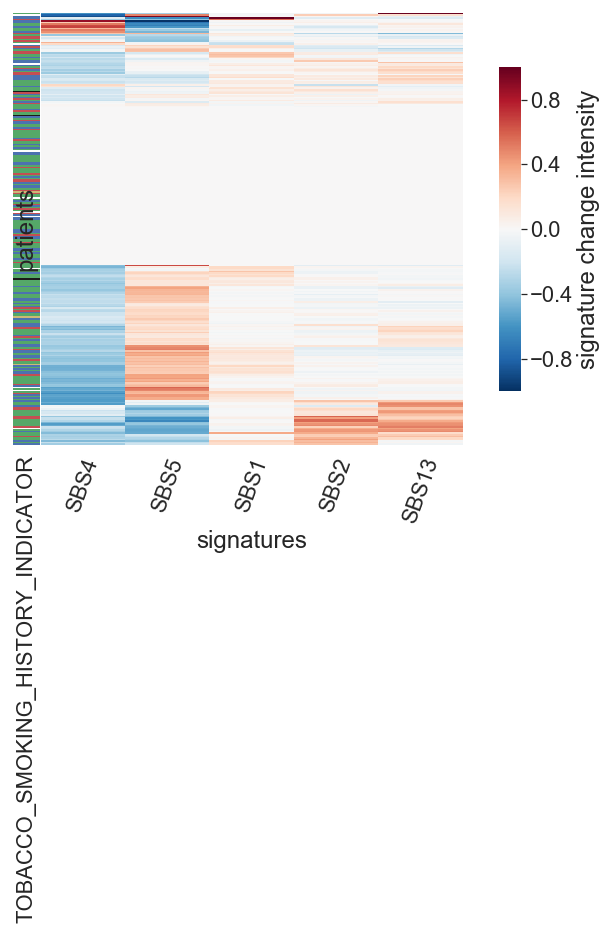

In [98]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_lusc[(clonesig_res_lusc.mutation_set=='protected')&(clonesig_res_lusc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.TOBACCO_SMOKING_HISTORY_INDICATOR.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### MESO

In [99]:
clonesig_res_meso = clonesig_res[clonesig_res.cancer_loc_x=='MESO'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/MESO/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'r', 'Male': 'b'}


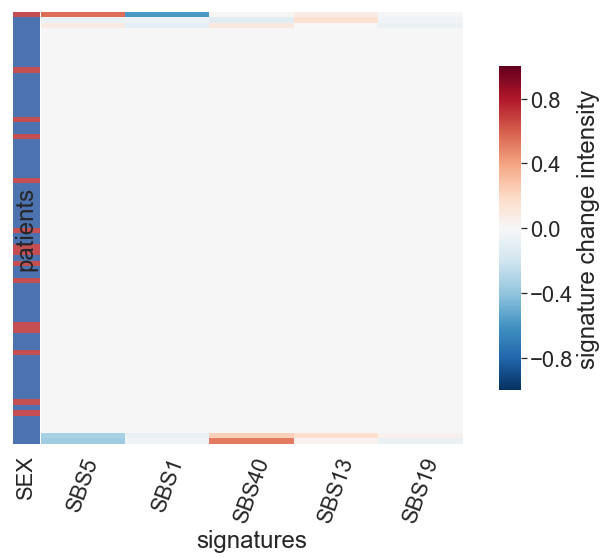

In [102]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_meso[(clonesig_res_meso.mutation_set=='protected')&(clonesig_res_meso.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'k', 'T2': 'r', 'T4': 'g', 'T3': 'b', 'TX': 'y'}


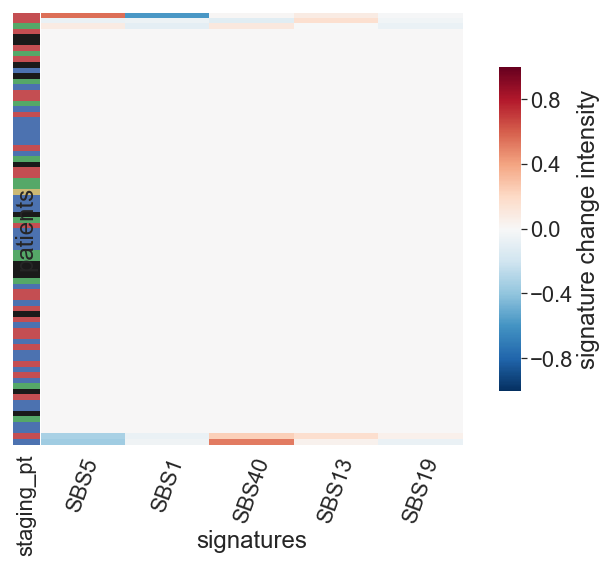

In [103]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_meso[(clonesig_res_meso.mutation_set=='protected')&(clonesig_res_meso.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'b', 'I': 'y', 'IV': 'g'}


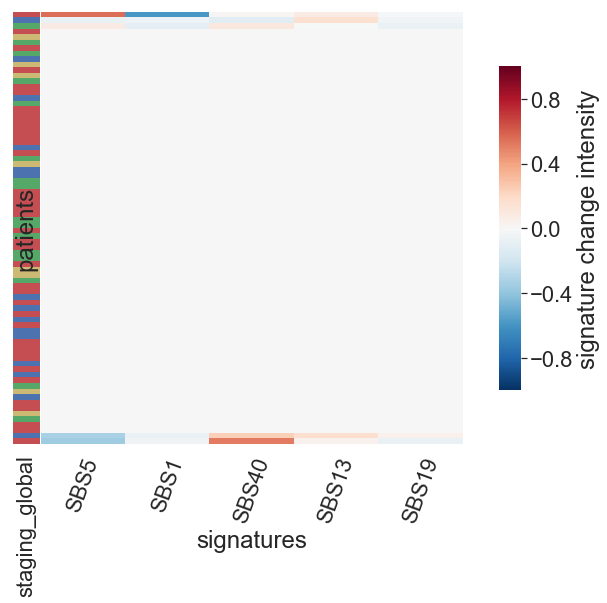

In [105]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_meso[(clonesig_res_meso.mutation_set=='protected')&(clonesig_res_meso.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### OV

In [108]:
clonesig_res_ov = clonesig_res[clonesig_res.cancer_loc_x=='OV'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/OV/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'[Not Available]': 'b', 'G3': 'r', 'G2': 'g', 'GB': 'k', 'G1': 'y'}


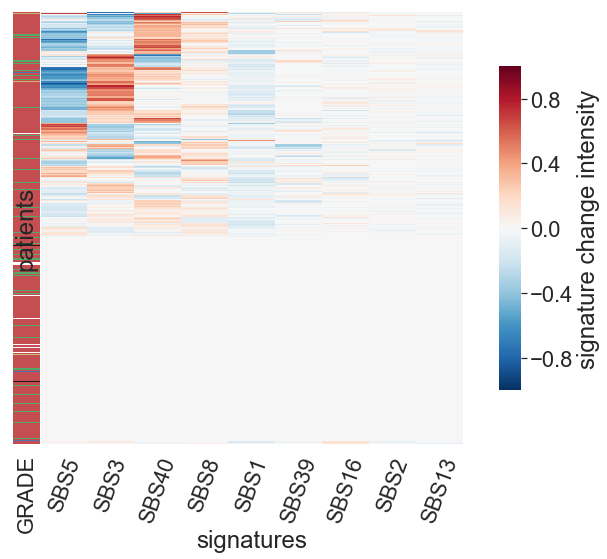

In [111]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_ov[(clonesig_res_ov.mutation_set=='protected')&(clonesig_res_ov.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.GRADE.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.GRADE.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### PAAD

In [112]:
clonesig_res_paad = clonesig_res[clonesig_res.cancer_loc_x=='PAAD'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/PAAD/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'III': 'y', 'II': 'r', '[Discrepancy]': 'k', 'I': 'b', 'IV': 'g'}


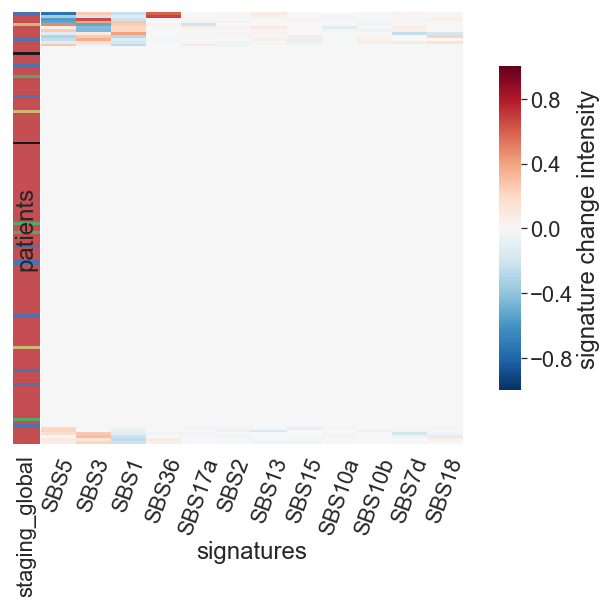

In [116]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_paad[(clonesig_res_paad.mutation_set=='protected')&(clonesig_res_paad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



{'Female': 'r', 'Male': 'b'}


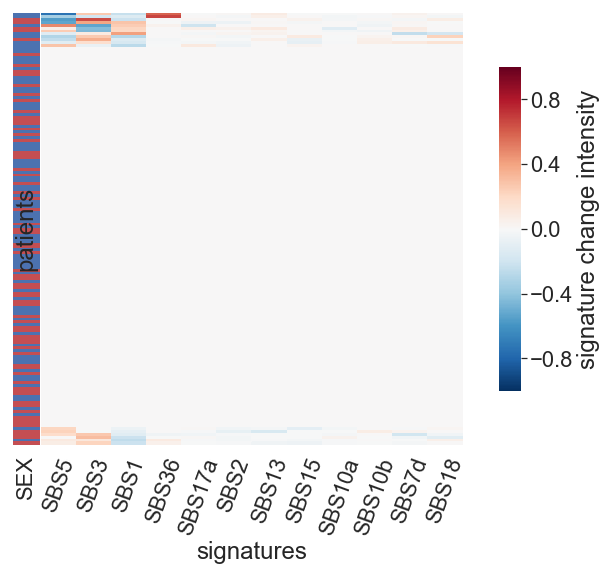

In [119]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_paad[(clonesig_res_paad.mutation_set=='protected')&(clonesig_res_paad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



{'T1': 'g', 'T2': 'b', 'T4': 'y', 'T3': 'r', '[D': 'k'}


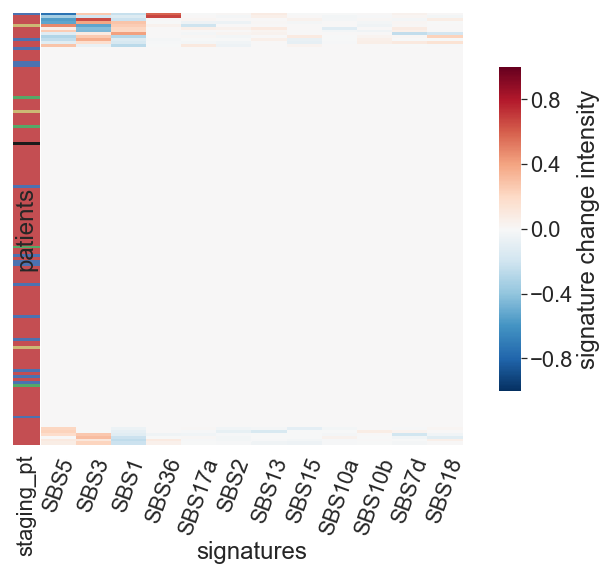

In [120]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_paad[(clonesig_res_paad.mutation_set=='protected')&(clonesig_res_paad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### PCPG

In [123]:
clonesig_res_pcpg = clonesig_res[clonesig_res.cancer_loc_x=='PCPG'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/PCPG/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
#clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
#clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'r', 'Male': 'b'}


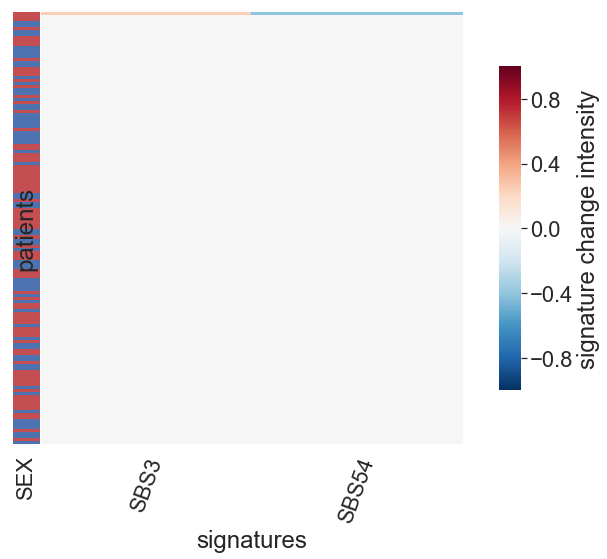

In [124]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_pcpg[(clonesig_res_pcpg.mutation_set=='protected')&(clonesig_res_pcpg.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### PRAD

In [126]:
clonesig_res_prad = clonesig_res[clonesig_res.cancer_loc_x=='PRAD'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/PRAD/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{8: 'k', 9: 'b', 10: 'y', 6: 'g', 7: 'r'}


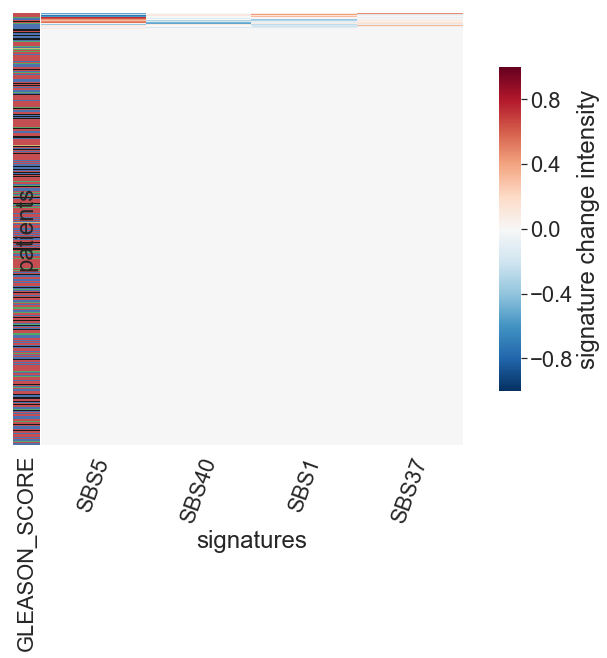

In [127]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_prad[(clonesig_res_prad.mutation_set=='protected')&(clonesig_res_prad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.GLEASON_SCORE.unique(), "rbgky"))
row_colors = sub_protected_chg_m.GLEASON_SCORE.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



### SARC

In [130]:
clonesig_res_sarc = clonesig_res[clonesig_res.cancer_loc_x=='SARC'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/SARC/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)


{'Female': 'r', 'Male': 'b'}


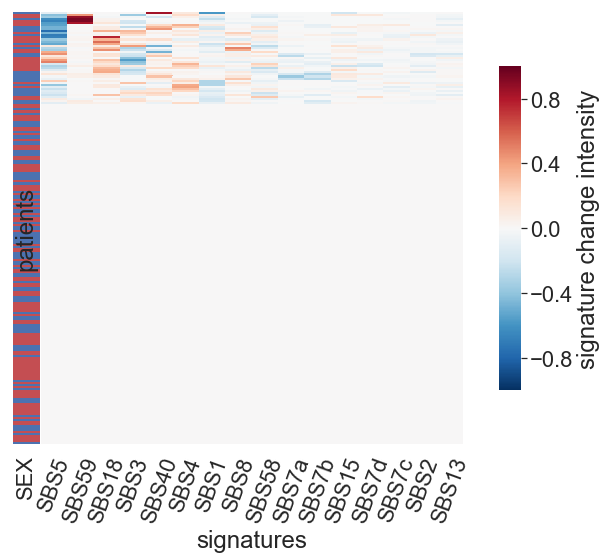

In [132]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_sarc[(clonesig_res_sarc.mutation_set=='protected')&(clonesig_res_sarc.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>0.2]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### SKCM

In [133]:
clonesig_res_skcm = clonesig_res[clonesig_res.cancer_loc_x=='SKCM'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/SKCM/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


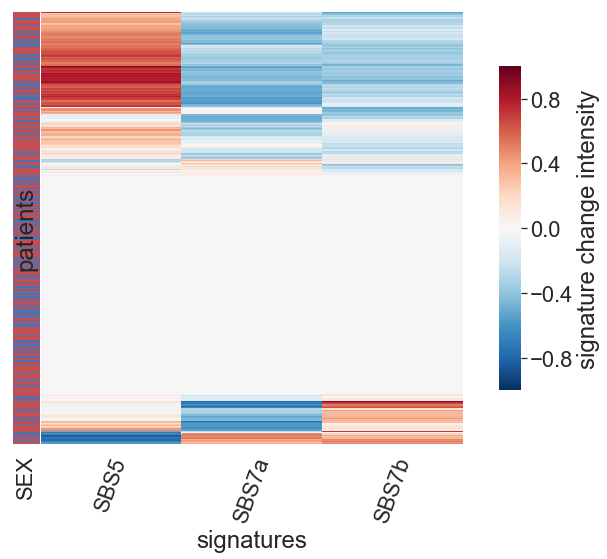

In [134]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_skcm[(clonesig_res_skcm.mutation_set=='protected')&(clonesig_res_skcm.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T0': 'g', '[N': 'y', 'T2': 'r', 'T4': 'b', 'TX': 'k'}


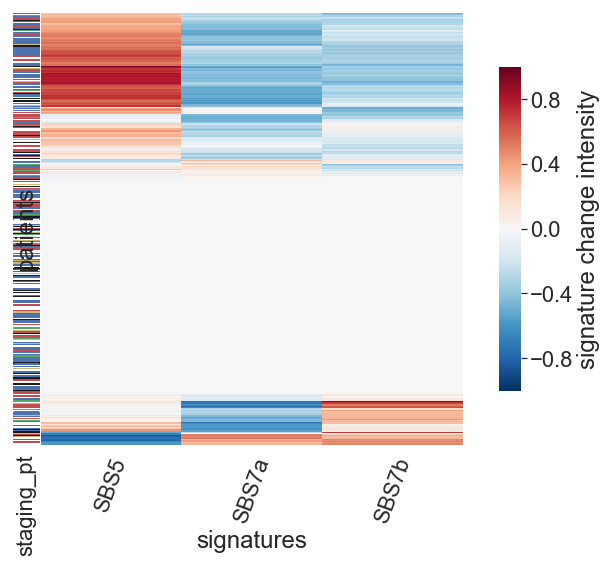

In [135]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_skcm[(clonesig_res_skcm.mutation_set=='protected')&(clonesig_res_skcm.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'y', 'I': 'g', '[Not vailable]': 'b', 'IV': 'k'}


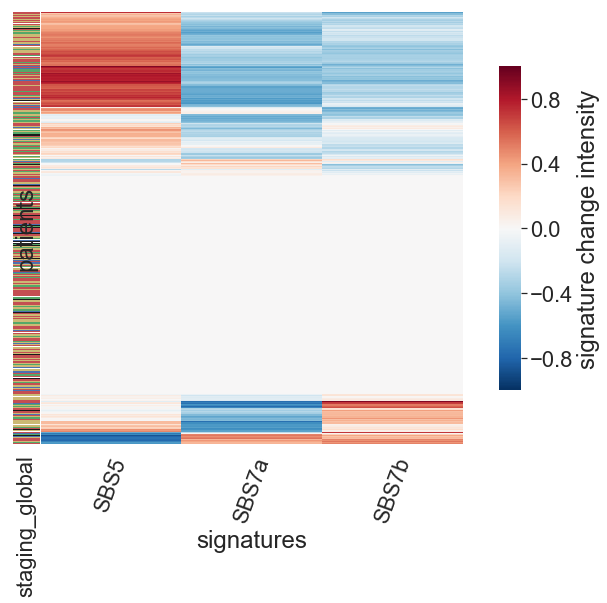

In [136]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_skcm[(clonesig_res_skcm.mutation_set=='protected')&(clonesig_res_skcm.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)



### STAD

In [137]:
clonesig_res_stad = clonesig_res[clonesig_res.cancer_loc_x=='STAD'].reset_index()
clinical_data = pd.read_csv('data_tcga_wes/STAD/clinical/data_bcr_clinical_data_patient.txt', sep='\t', skiprows=4)
clinical_data = clinical_data.assign(staging_pt=clinical_data.AJCC_TUMOR_PATHOLOGIC_PT.str[:2])
clinical_data = clinical_data.assign(staging_global=clinical_data.AJCC_PATHOLOGIC_TUMOR_STAGE.str.replace('A', '').str.replace('Stage ', '').str.replace('B', '').str.replace('C', ''))


{'Female': 'b', 'Male': 'r'}


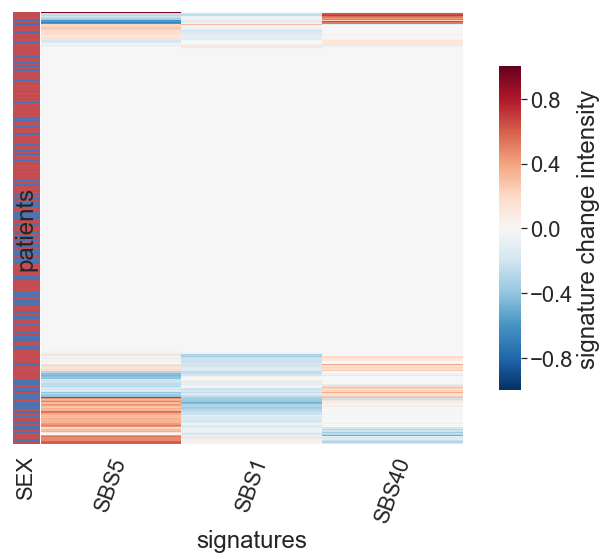

In [140]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_stad[(clonesig_res_stad.mutation_set=='protected')&(clonesig_res_stad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.SEX.unique(), "rbgky"))
row_colors = sub_protected_chg_m.SEX.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'T1': 'k', 'T2': 'g', 'T4': 'b', 'T3': 'r', 'TX': 'y'}


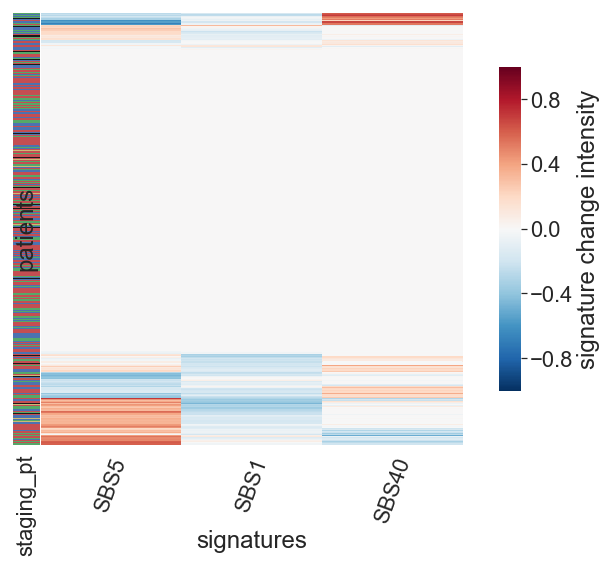

In [141]:
np.random.seed(5)
sns.set(font_scale=2)
sub_protected_chg = clonesig_res_stad[(clonesig_res_stad.mutation_set=='protected')&(clonesig_res_stad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_pt.unique(), "rbgky"))
row_colors = sub_protected_chg_m.staging_pt.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")

print(lut)



{'III': 'r', 'II': 'b', '[Discrepancy]': 'k', 'I': 'y', 'IV': 'g'}


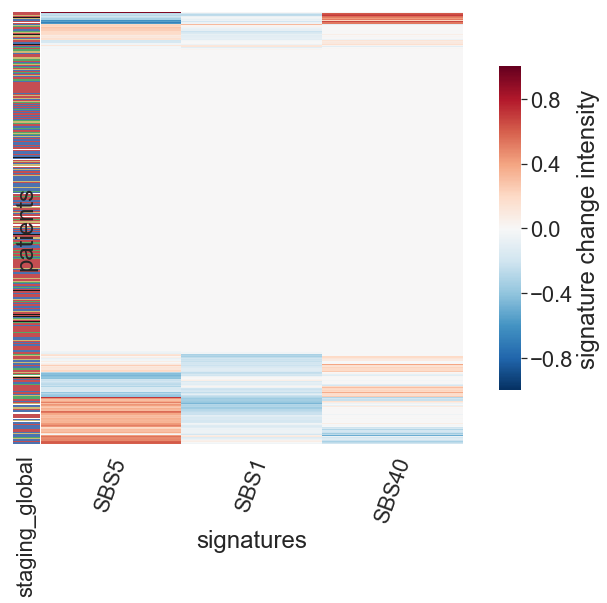

In [142]:

sns.set(font_scale=2)
sub_protected_chg = clonesig_res_stad[(clonesig_res_stad.mutation_set=='protected')&(clonesig_res_stad.pval<1.05)]#&(clonesig_res.nb_mut>200)&(clonesig_res.purity>0.4)]
sub_protected_chg_m = pd.merge(sub_protected_chg, clinical_data, how='left', left_on='patient_id', right_on='PATIENT_ID')
sbs_names = [c.split('_')[1] for c in sub_protected_chg_m if 'subclonal_SBS' in c]
bla_protected = pd.DataFrame(sub_protected_chg_m[[c for c in sub_protected_chg_m if 'subclonal_SBS' in c]].fillna(0).values - sub_protected_chg_m[[c for c in sub_protected_chg_m if ('clonal_SBS' in c) and ("sub" not in c)]].fillna(0).values, columns=sbs_names)
bla_protected[bla_protected.index.isin(sub_protected_chg_m[sub_protected_chg_m.pval>0.05].index)] = 0

lut = dict(zip(sub_protected_chg_m.staging_global.unique(), "rbgyk"))
row_colors = sub_protected_chg_m.staging_global.map(lut)

g=sns.clustermap(bla_protected[[c for i, c in enumerate(bla_protected.columns) if np.abs(bla_protected).sum(axis=0)[c]>12]], cmap="RdBu_r", vmin=-1, vmax=1, yticklabels=False, row_colors=row_colors)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([0.95, .2, .03, .45])
g.cax.set_ylabel('signature change intensity', position=(0, 0.5), x=10)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=70)
g.ax_heatmap.set_xlabel('signatures')
g.ax_heatmap.set_ylabel('patients')
g.ax_heatmap.yaxis.set_label_position("left")
print(lut)

